In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import os
import numpy as np
import glob
import scipy
import seaborn

In [2]:

uni = "202211107_model_6_3_20000_1024_all"
# uni = "202211101_model6_1to10_E_"

geo = 1 ## 1 jsns2 / 2 cylinder / 3 sphere

# path = "/users/yewzzang/work/JSNS2_vertex/result/" + uni +"*/train.csv"
# train_path = glob.glob(path)
# train_list = [file for file in train_path if file.endswith(".csv")]


path = "/users/yewzzang/work/JSNS2_vertex/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [3]:
df = pd.read_csv(pred_list[0])

In [4]:
pred = np.array(df['prediction']).reshape(-1,3)
pred

array([[ 0.60412306,  0.67279196,  0.401719  ],
       [-0.028357  ,  0.0606169 ,  0.94343704],
       [-0.75056857,  0.00991114,  1.03126001],
       ...,
       [ 0.46455708, -0.76059127,  0.77953154],
       [ 0.30693737, -1.36759818, -0.65257794],
       [ 0.16592309, -0.87657803,  0.60591954]])

In [5]:
label = np.array(df['label']).reshape(-1,3)
label

array([[ 0.48349199,  0.113497  , -0.488801  ],
       [-0.104915  ,  0.0616697 ,  1.08345997],
       [-0.835343  ,  0.0739969 ,  1.00161004],
       ...,
       [ 0.71109802, -0.974042  ,  0.64950597],
       [ 0.39376599, -1.32509995, -0.75608301],
       [ 0.130877  , -1.03713   ,  0.30532601]])

In [6]:
jade = np.array(df['jade']).reshape(-1,3)
jade

array([[ 0.5214681 ,  0.51289129,  0.10909463],
       [-0.14241379,  0.04896281,  1.1579417 ],
       [-1.04201412,  0.17311622,  1.16736925],
       ...,
       [ 0.26699269, -0.64759535,  0.80587387],
       [ 0.28577328, -1.43523979, -0.69893342],
       [ 0.19956778, -0.96098113,  0.69375646]])

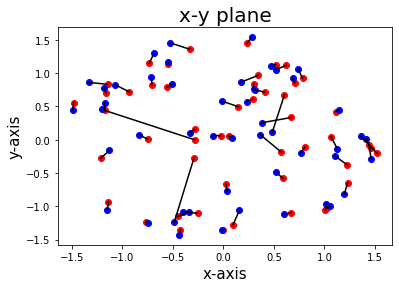

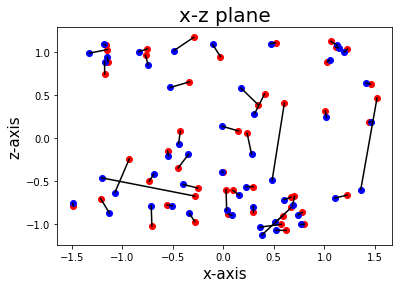

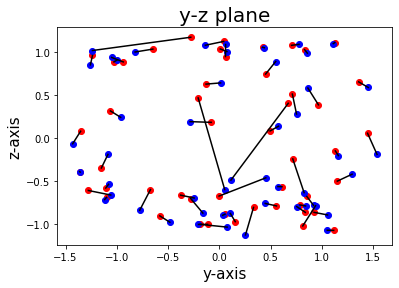

In [7]:
plt.scatter(pred[:50,0],pred[:50,1],color='r')
plt.scatter(label[:50,0],label[:50,1],color='b')
for i in range(50):
    plt.plot([pred[i,0],label[i,0]],[pred[i,1],label[i,1]],'k-')
plt.title('x-y plane',fontsize=20)
plt.xlabel('x-axis',fontsize=15)
plt.ylabel('y-axis',fontsize=15)
plt.show()

plt.scatter(pred[:50,0],pred[:50,2],color='r')
plt.scatter(label[:50,0],label[:50,2],color='b')
for i in range(50):
    plt.plot([pred[i,0],label[i,0]],[pred[i,2],label[i,2]],'k-')
plt.title('x-z plane',fontsize=20)
plt.xlabel('x-axis',fontsize=15)
plt.ylabel('z-axis',fontsize=15)
plt.show()

plt.scatter(pred[:50,1],pred[:50,2],color='r')
plt.scatter(label[:50,1],label[:50,2],color='b')
for i in range(50):
    plt.plot([pred[i,1],label[i,1]],[pred[i,2],label[i,2]],'k-')
plt.title('y-z plane',fontsize=20)
plt.xlabel('y-axis',fontsize=15)
plt.ylabel('z-axis',fontsize=15)
plt.show()




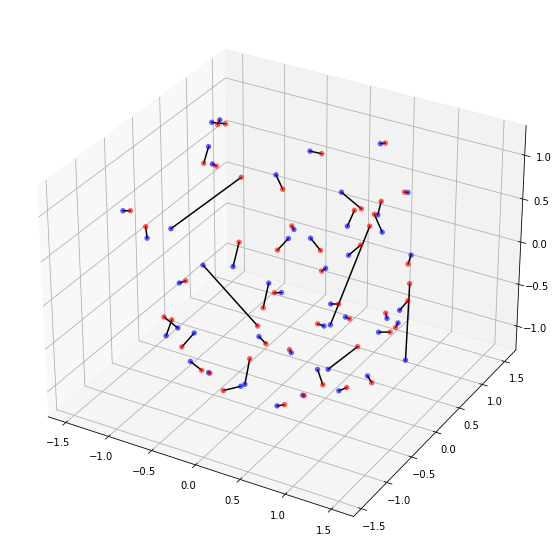

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pred[:50,0], pred[:50,1], pred[:50,2], color = 'r', alpha = 0.5)
ax.scatter(label[:50,0], label[:50,1], label[:50,2], color = 'b', alpha = 0.5)
# ax.plot3D([0,1],[0,1],[0,1])
# ax.plot3D([pred[:1,0][0],label[:1,0][0]],[pred[:1,1][0],label[:1,1][0]],[pred[:1,2][0],label[:1,2][0]])
for i in range(50):
    ax.plot3D([pred[i,0],label[i,0]],
               [pred[i,1],label[i,1]],
                [pred[i,2],label[i,2]],'black')


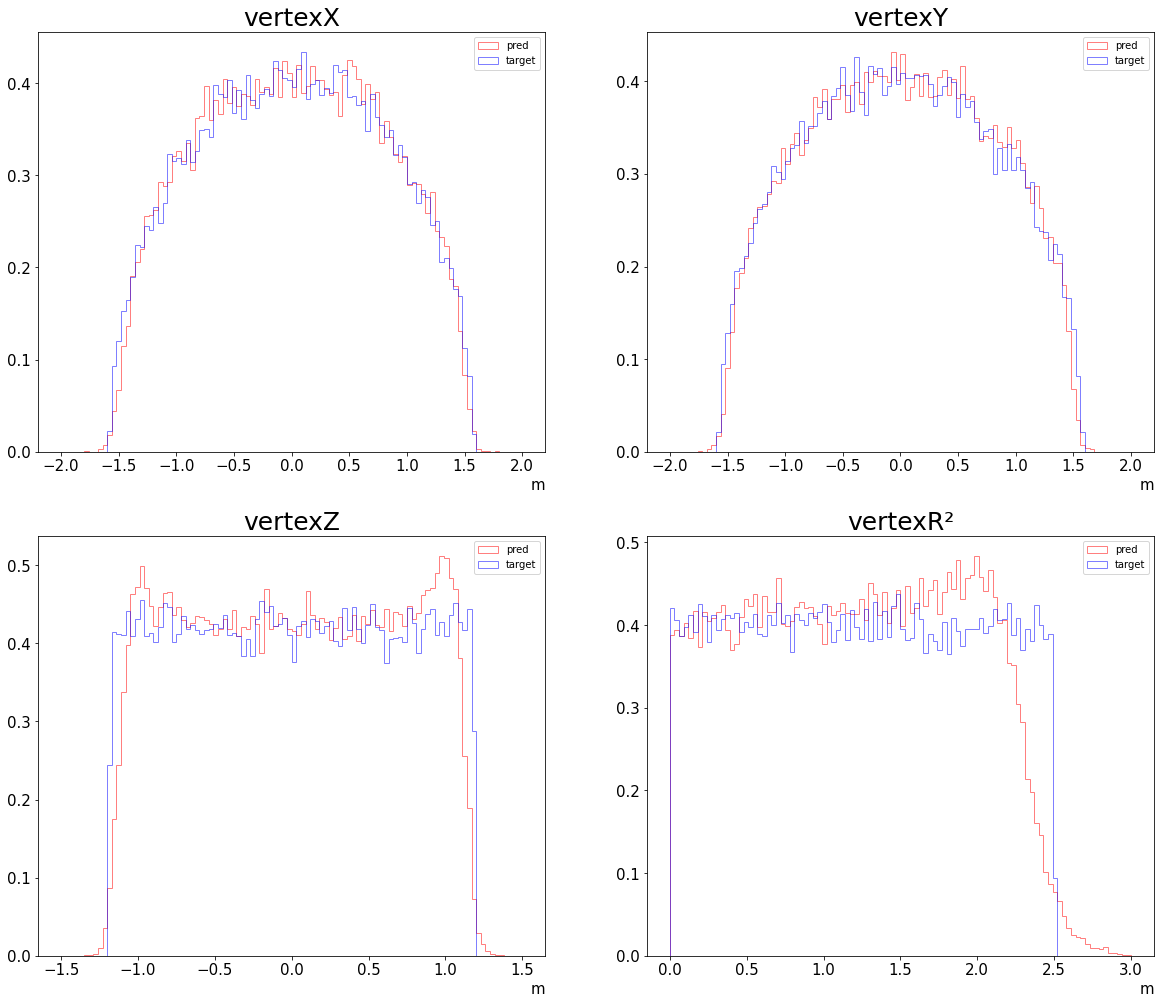

In [9]:
plt.rcParams['figure.figsize'] = (20, 17)
plt.subplot(2,2,1)
######### jsns2 geo
plt.hist(pred[:,0], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,0], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')

# plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
plt.title('vertexX',fontsize = 25)
# plt.xlim([-0.0005,0])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,2)

plt.hist(pred[:,1], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,1], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
# plt.hist(jade[:,1], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
plt.title('vertexY',fontsize = 25)
# plt.xlim([-0.00016,0])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()

plt.subplot(2,2,3)
plt.hist(pred[:,2], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
# plt.hist(jade[:,2], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,4)
plt.hist((pred[:,0]**2+pred[:,1]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist((label[:,0]**2+label[:,1]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
# plt.hist((jade[:,0]**2+jade[:,1]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

plt.title('vertexR\u00b2',fontsize = 25)
# plt.xlim([-1,6])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()


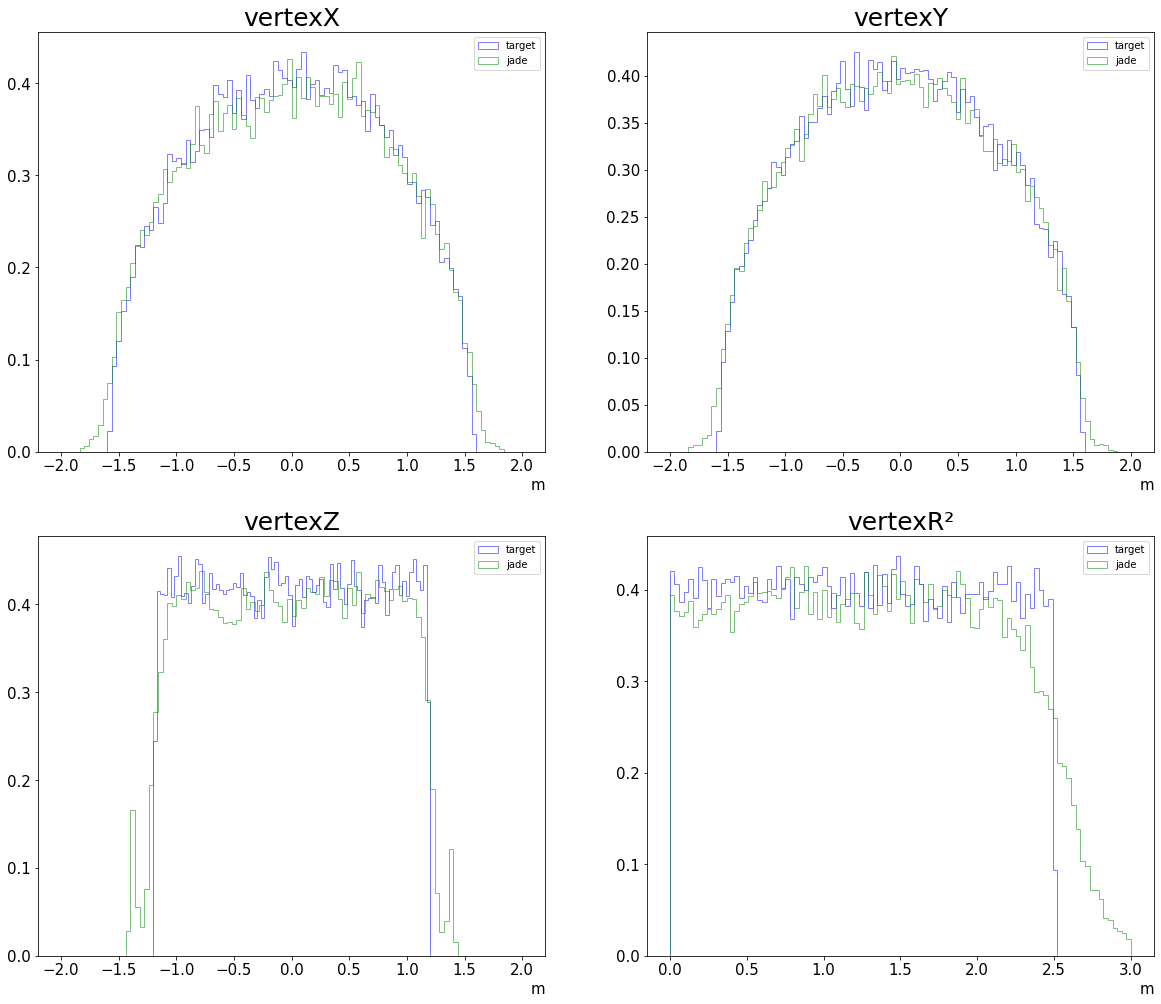

In [10]:
plt.rcParams['figure.figsize'] = (20, 17)
plt.subplot(2,2,1)
######### jsns2 geo
# plt.hist(pred[:,0], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,0], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')

plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
plt.title('vertexX',fontsize = 25)
# plt.xlim([-0.0005,0])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,2)

# plt.hist(pred[:,1], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,1], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.hist(jade[:,1], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
plt.title('vertexY',fontsize = 25)
# plt.xlim([-0.00016,0])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()

plt.subplot(2,2,3)
# plt.hist(pred[:,2], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.hist(jade[:,2], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,4)
# plt.hist((pred[:,0]**2+pred[:,1]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist((label[:,0]**2+label[:,1]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.hist((jade[:,0]**2+jade[:,1]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

plt.title('vertexR\u00b2',fontsize = 25)
# plt.xlim([-1,6])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()


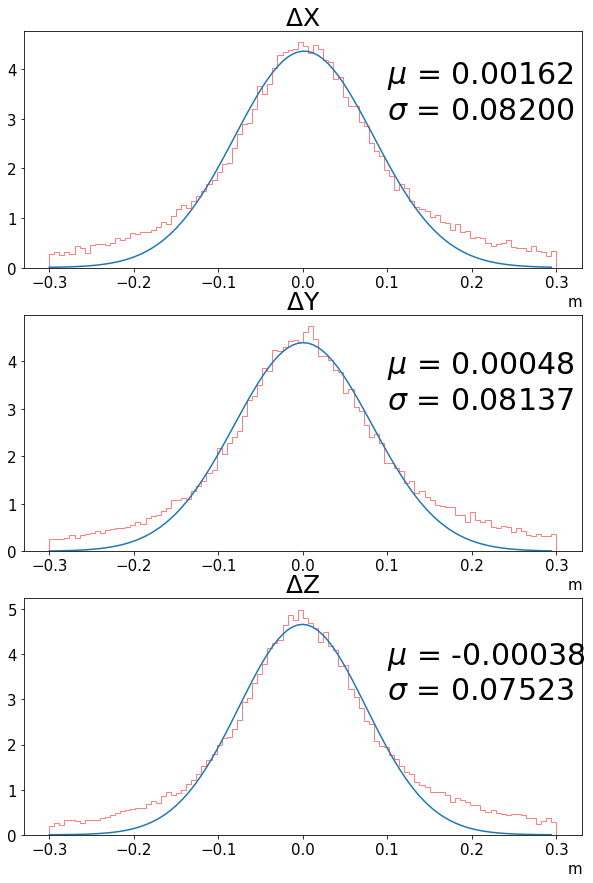

In [11]:
from scipy.optimize import curve_fit
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (10, 20)
plt.subplot(4,1,1)
tmp_hist = plt.hist(pred[:,0] - label[:,0],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.3, 0.3,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$X',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(4,1,2)

tmp_hist = plt.hist(pred[:,1] - label[:,1],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.3, 0.3,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Y',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(4,1,3)
tmp_hist = plt.hist(pred[:,2] - label[:,2],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.3, 0.3,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Z',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

plt.show()



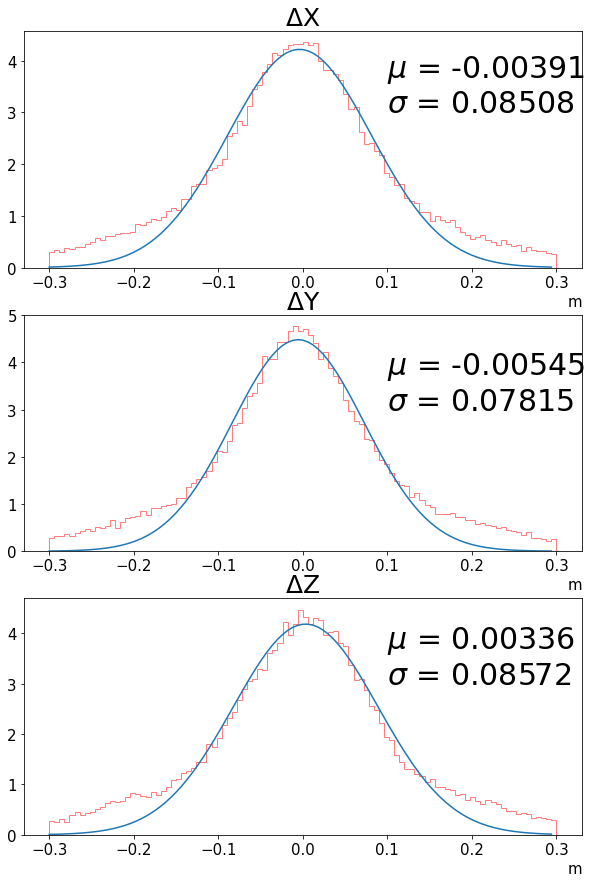

In [12]:
plt.rcParams['figure.figsize'] = (10, 20)
plt.subplot(4,1,1)
tmp_hist = plt.hist(jade[:,0] - label[:,0],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.3, 0.3,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$X',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(4,1,2)

tmp_hist = plt.hist(jade[:,1] - label[:,1],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.3, 0.3,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Y',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(4,1,3)
tmp_hist = plt.hist(jade[:,2] - label[:,2],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.3, 0.3,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Z',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

plt.show()



In [13]:
# plt.subplot(4,1,1)
R2_label = np.power(label[:,0],2)+np.power(label[:,1],2)
R2_pred = np.power(pred[:,0],2)+np.power(pred[:,1],2)
Z_label = label[:,2]
Z_pred = pred[:,2]
R2_jade = np.power(jade[:,0],2)+np.power(jade[:,1],2)
Z_jade = jade[:,2]

In [14]:
Z_label

array([-0.488801  ,  1.08345997,  1.00161004, ...,  0.64950597,
       -0.75608301,  0.30532601])

In [15]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]

RR = [0,0.5,1.0,1.5,2.0,20]

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

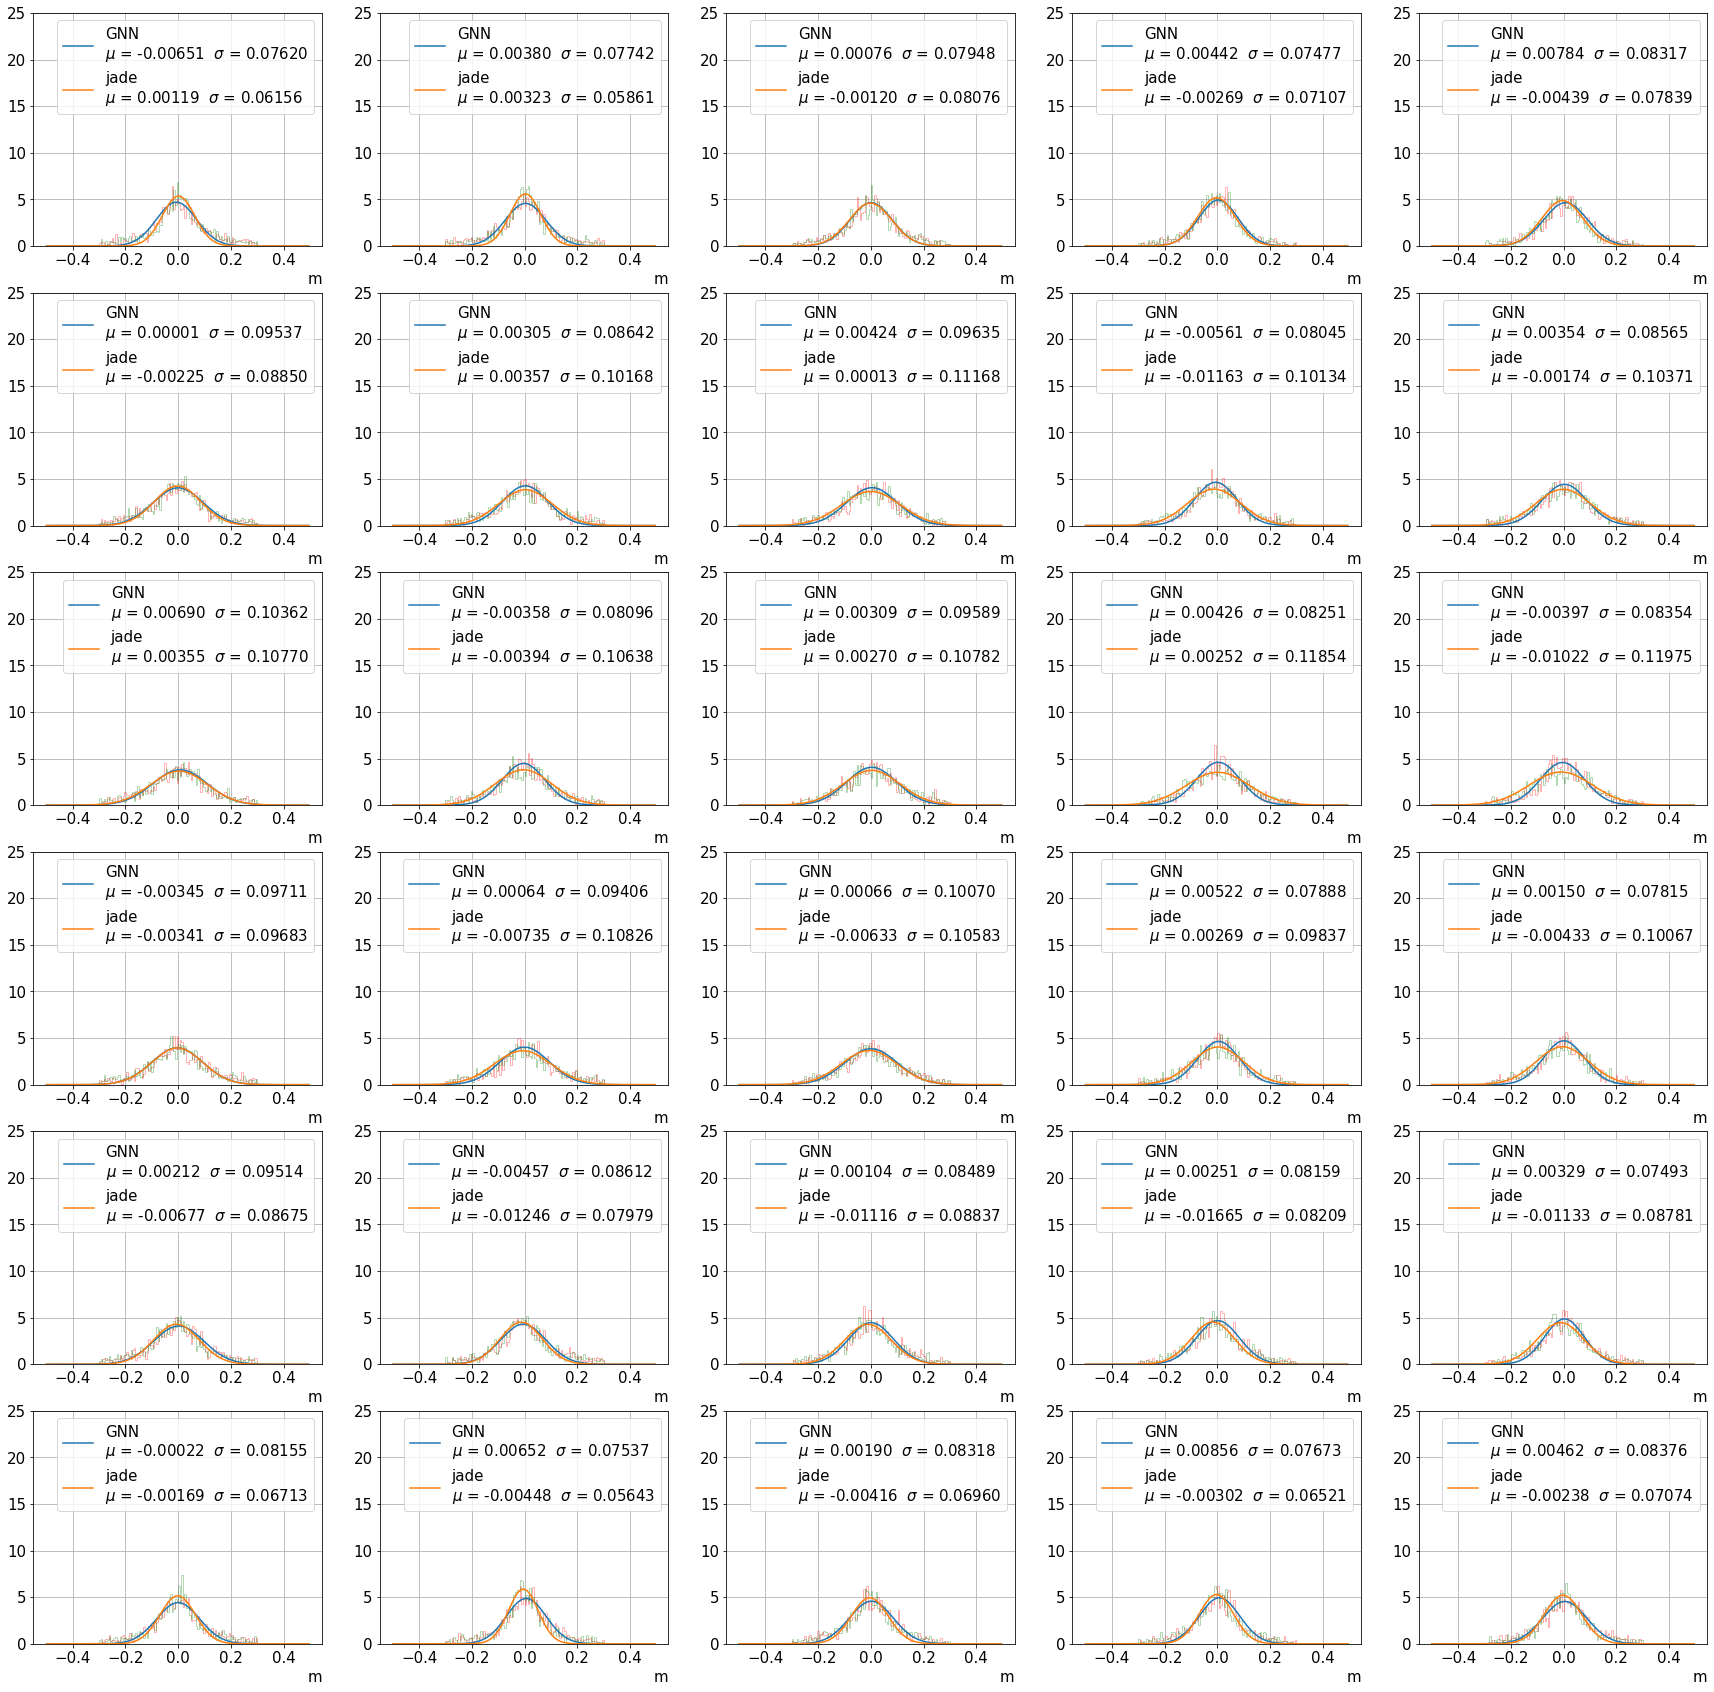

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

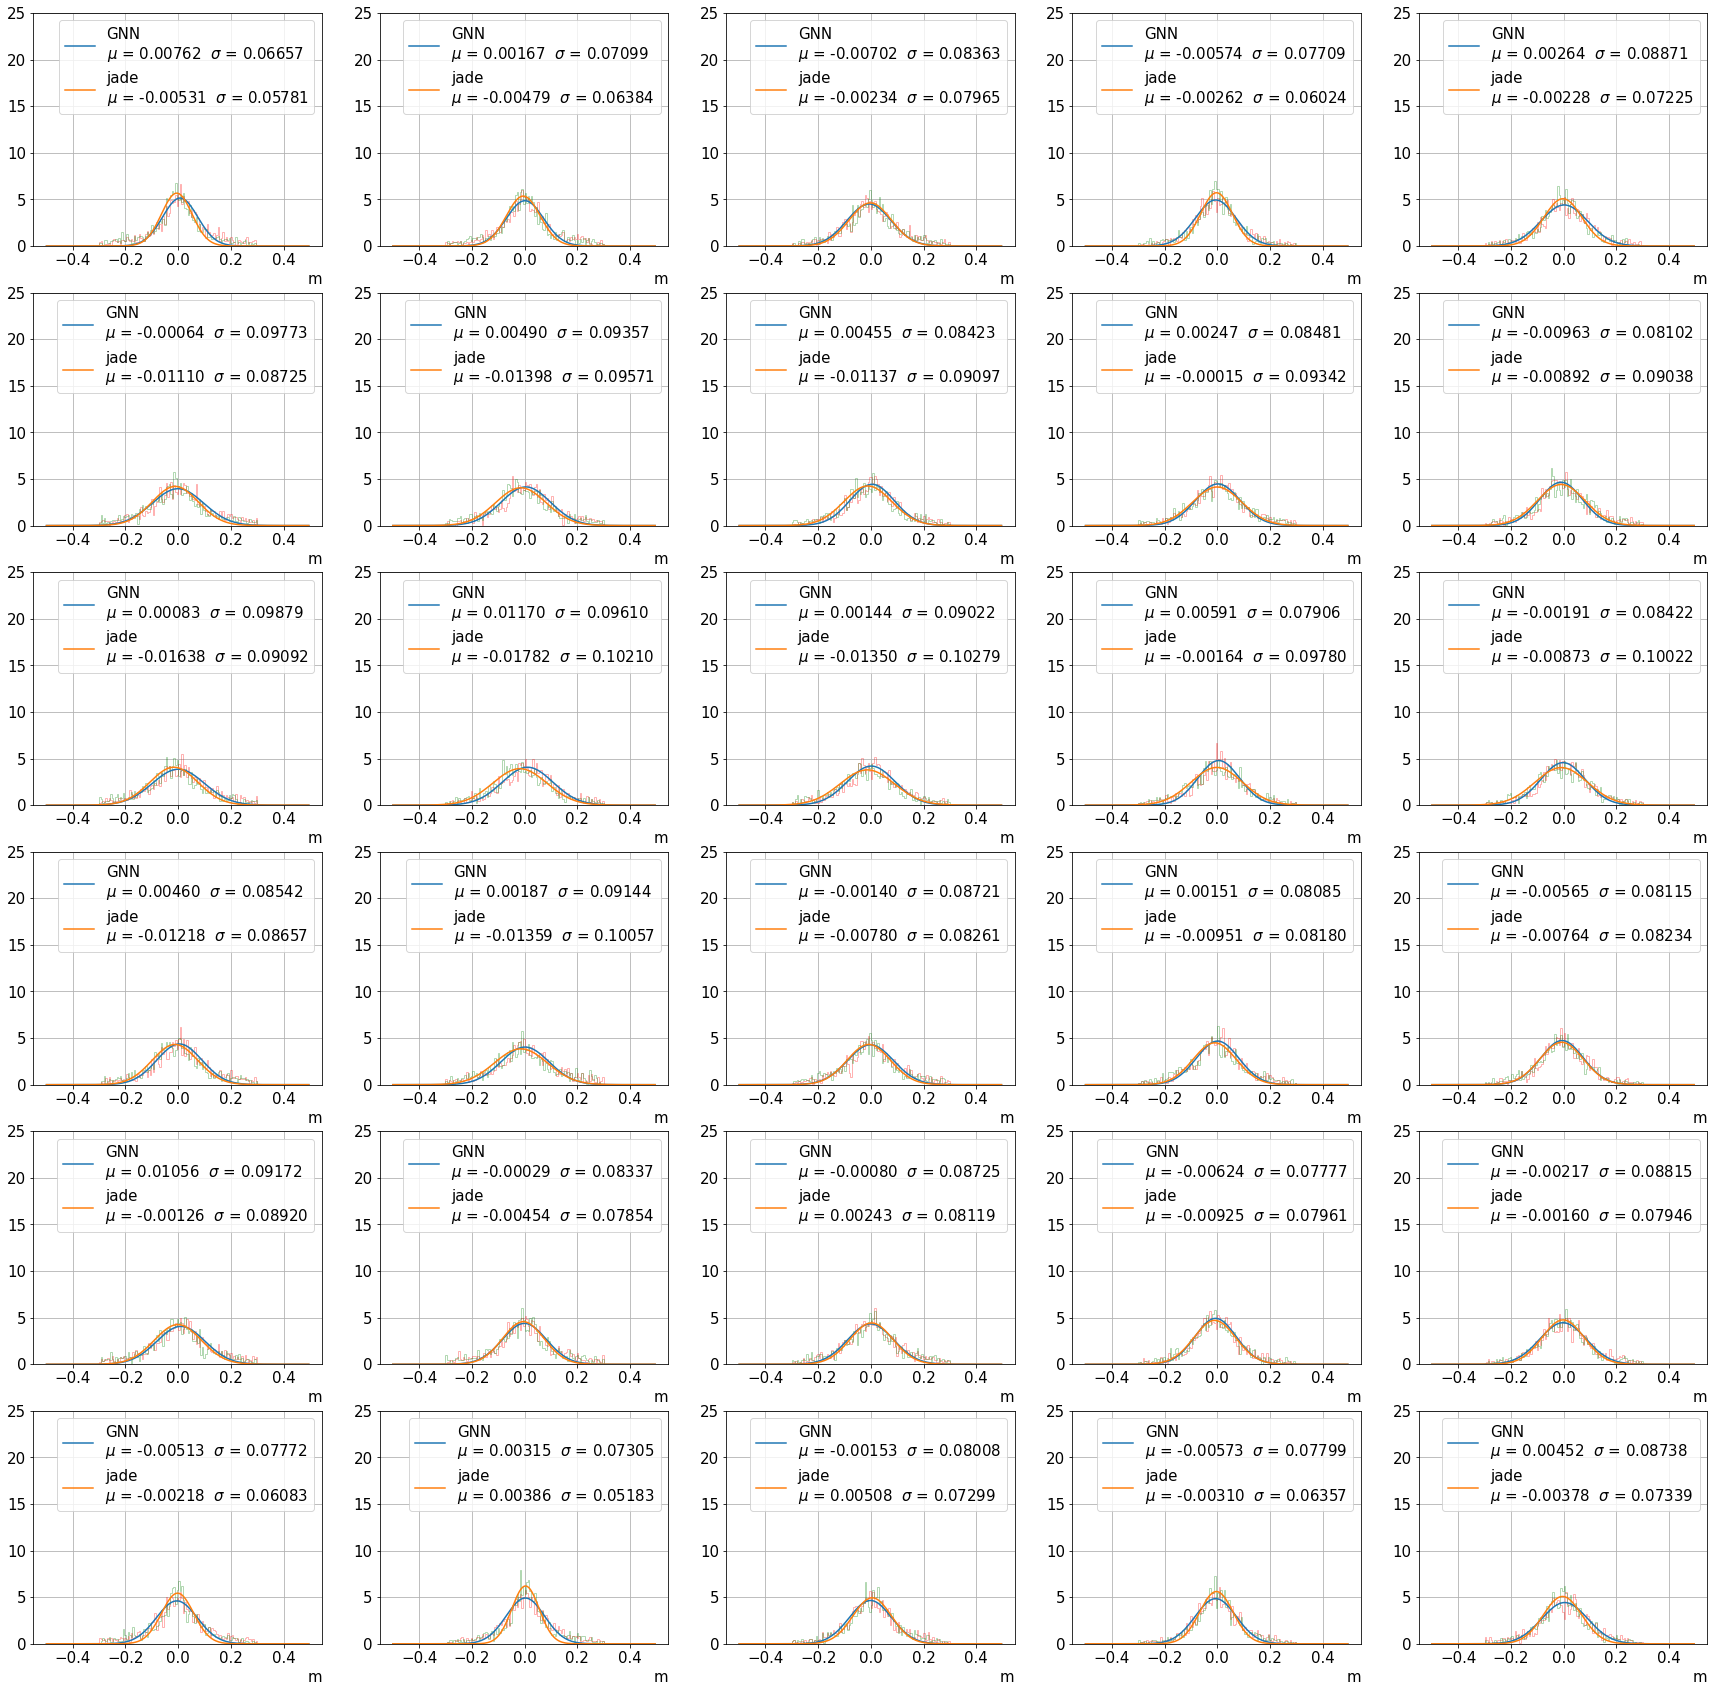

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

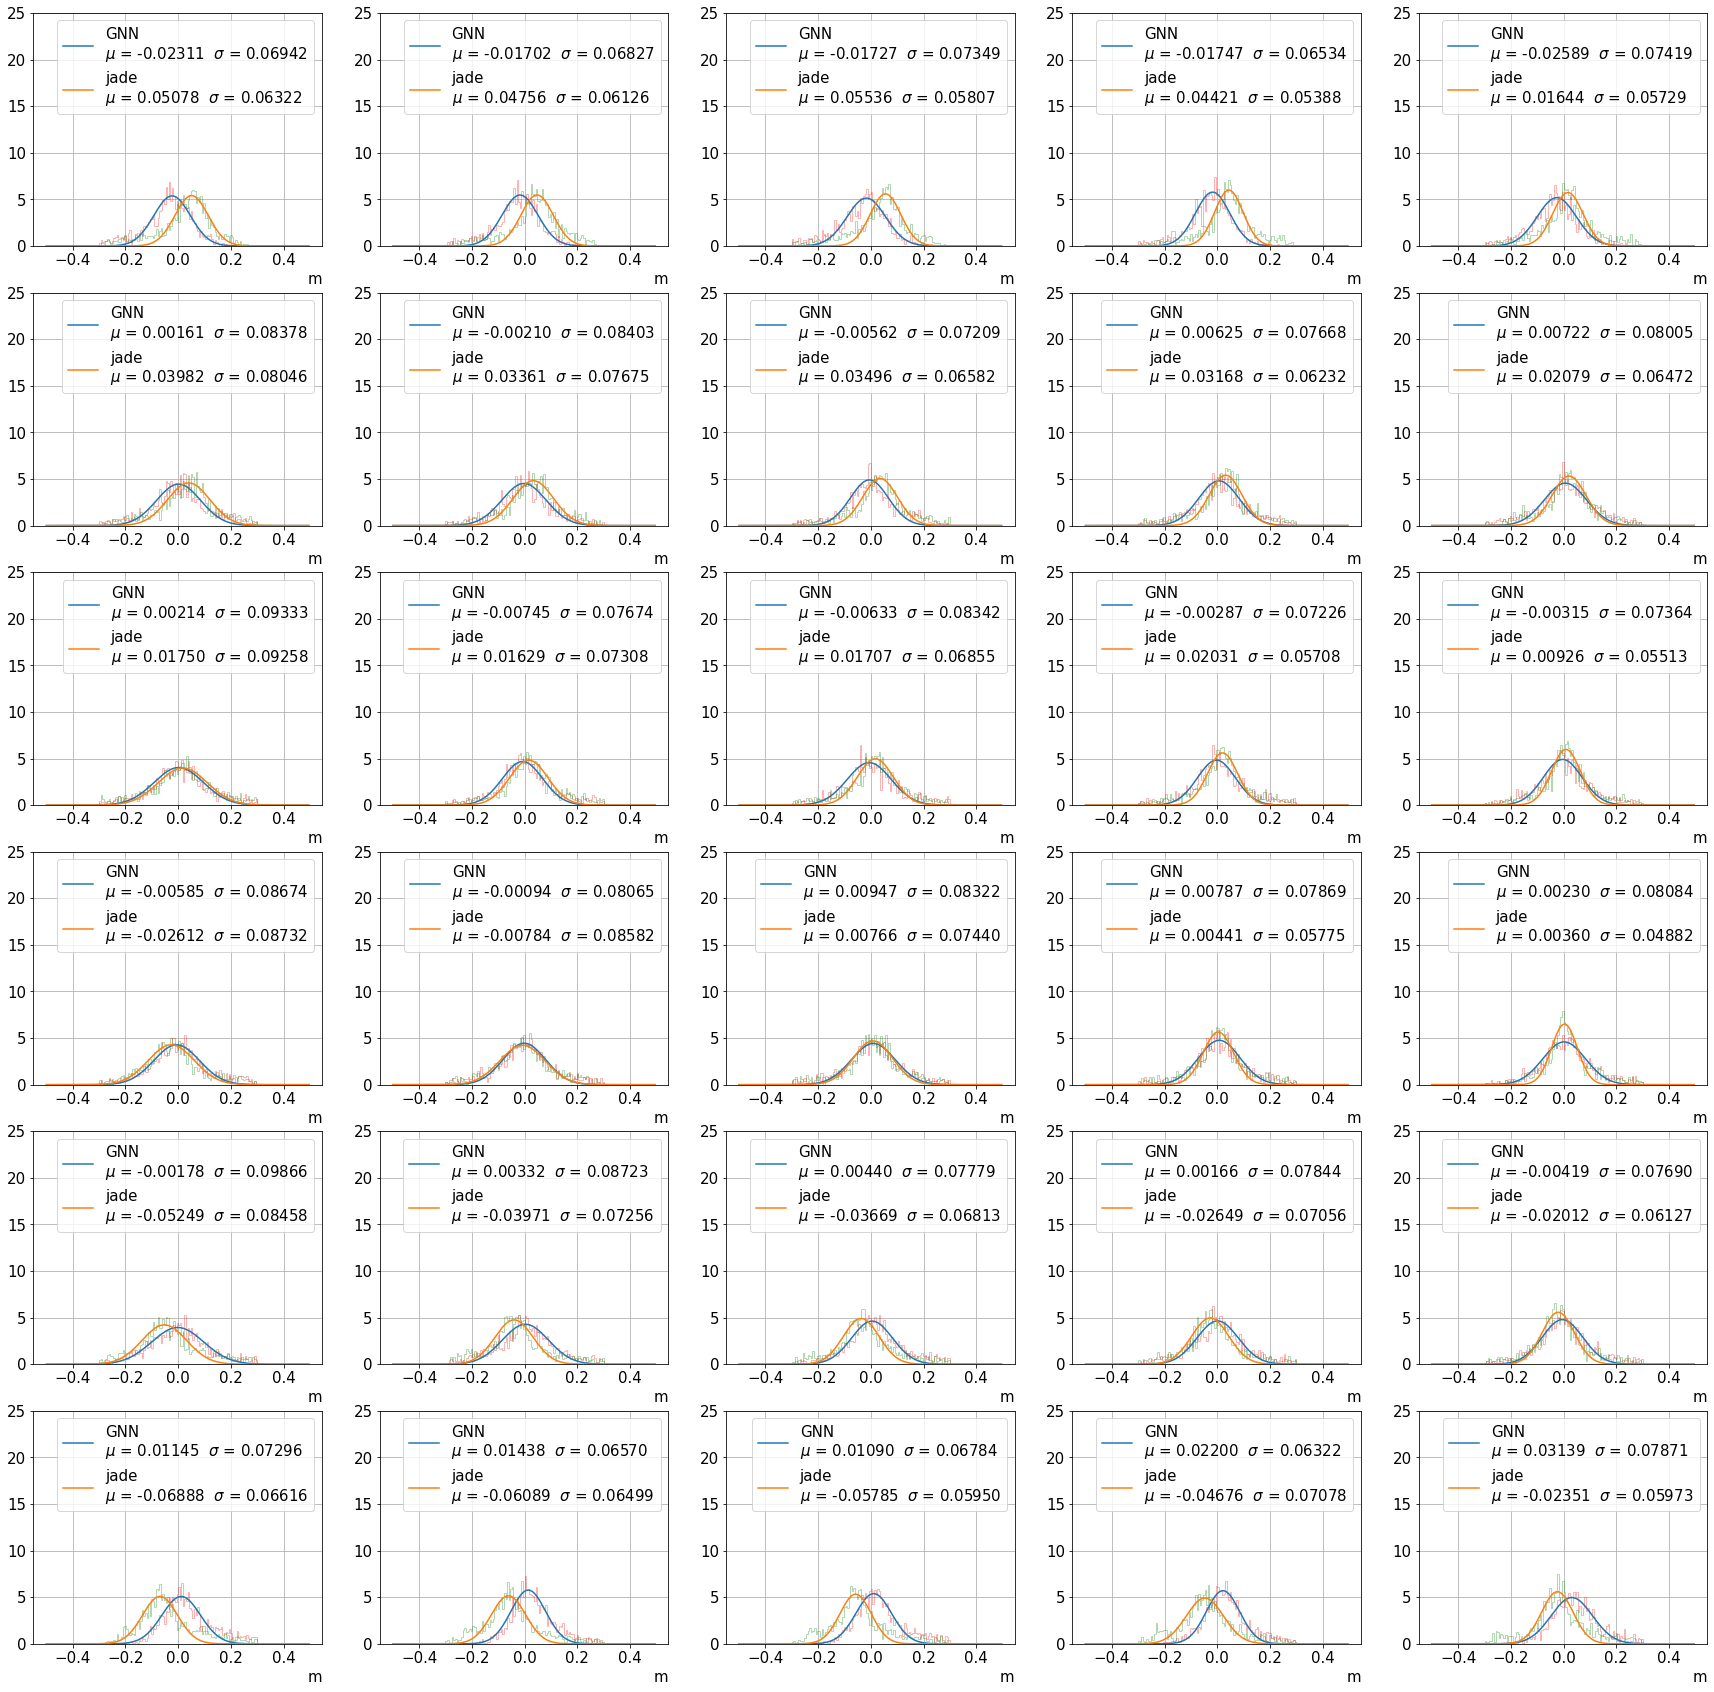

In [16]:
for ver in range(3):
    plt.rcParams['figure.figsize'] = (30, 30)
    ##################

    for k in range(6):
        for j in range(5):


            plt.subplot(6,5,5*k+(j+1))

            tmp_hist = plt.hist(pred[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.3, density = True, histtype = 'step')
            tmp_hist_jade = plt.hist(jade[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'g', alpha = 0.3, density = True, histtype = 'step')


            hist_N = tmp_hist[0]
            hist_x = []

            hist_N_jade = tmp_hist_jade[0]
            hist_x_jade = []

            for i in range(len(tmp_hist[1])-1):
                tmp = tmp_hist[1]
                hist_x.append((tmp[i] + tmp[i+1])/2.)
            hist_x = np.array(hist_x)

            for i in range(len(tmp_hist_jade [1])-1):
                tmp_jade  = tmp_hist_jade [1]
                hist_x_jade .append((tmp_jade [i] + tmp_jade [i+1])/2.)
            hist_x_jade  = np.array(hist_x_jade )

            popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
            hist_xx = np.arange(-0.5, 0.5,0.6/100.)


            popt_jade, pcov_jade = curve_fit(gaussian, hist_x_jade, hist_N_jade, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N_jade), absolute_sigma=True)
            hist_xx_jade = np.arange(-0.5, 0.5,0.6/100.)


            ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    #         plt.title(r'$\Delta$X',fontsize = 25)
            plt.xticks(fontsize = 15)
            plt.yticks(fontsize = 15)

            plt.xlabel("m", fontsize=15, loc='right')
    #         plt.text(-0.3,15,'GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=10)
            plt.plot(hist_xx, gaussian(hist_xx,*popt),label='GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt[2]):.5f}")


    #         plt.text(0,15,'jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}",fontsize=10)
            plt.plot(hist_xx_jade, gaussian(hist_xx_jade,*popt_jade),label='jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}")
    #         plt.vlines(0,0,15,colors='red')
            plt.ylim([0,25])
            plt.grid()
            plt.legend(fontsize = 15)
    plt.show()

In [17]:
# plt.rcParams['figure.figsize'] = (30, 30)
# ##################

# for k in range(6):
#     for j in range(5):
        

#         plt.subplot(6,5,5*k+(j+1))

# #         tmp_hist = plt.hist(R2_pred[(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - R2_label[(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.0, density = True, histtype = 'step')
# #         tmp_hist_jade = plt.hist(R2_jade[(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - R2_label[(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'g', alpha = 0.0, density = True, histtype = 'step')
        
#         tmp_hist = plt.hist(pred[:,1][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,1][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.3, density = True, histtype = 'step')
#         tmp_hist_jade = plt.hist(jade[:,1][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,1][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'g', alpha = 0.3, density = True, histtype = 'step')

        
#         hist_N = tmp_hist[0]
#         hist_x = []

#         hist_N_jade = tmp_hist_jade[0]
#         hist_x_jade = []

#         for i in range(len(tmp_hist[1])-1):
#             tmp = tmp_hist[1]
#             hist_x.append((tmp[i] + tmp[i+1])/2.)
#         hist_x = np.array(hist_x)

#         for i in range(len(tmp_hist_jade [1])-1):
#             tmp_jade  = tmp_hist_jade [1]
#             hist_x_jade .append((tmp_jade [i] + tmp_jade [i+1])/2.)
#         hist_x_jade  = np.array(hist_x_jade )

#         popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
#         hist_xx = np.arange(-0.5, 0.5,0.6/100.)


#         popt_jade, pcov_jade = curve_fit(gaussian, hist_x_jade, hist_N_jade, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N_jade), absolute_sigma=True)
#         hist_xx_jade = np.arange(-0.5, 0.5,0.6/100.)


#         ##A = popt[0]; mu = popt[1]; sigma = popt[2]
# #         plt.title(r'$\Delta$X',fontsize = 25)
#         plt.xticks(fontsize = 15)
#         plt.yticks(fontsize = 15)

#         plt.xlabel("m", fontsize=15, loc='right')
# #         plt.text(-0.3,15,'GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=10)
#         plt.plot(hist_xx, gaussian(hist_xx,*popt),label='GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt[2]):.5f}")


# #         plt.text(0,15,'jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}",fontsize=10)
#         plt.plot(hist_xx_jade, gaussian(hist_xx_jade,*popt_jade),label='jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}")
# #         plt.vlines(0,0,15,colors='red')
#         plt.ylim([0,25])
#         plt.grid()
#         plt.legend(fontsize = 15)
# plt.show()

In [18]:
ZZ = [8,0.4,-0.4,-8]

RR = [0,0.7,1.4,20]

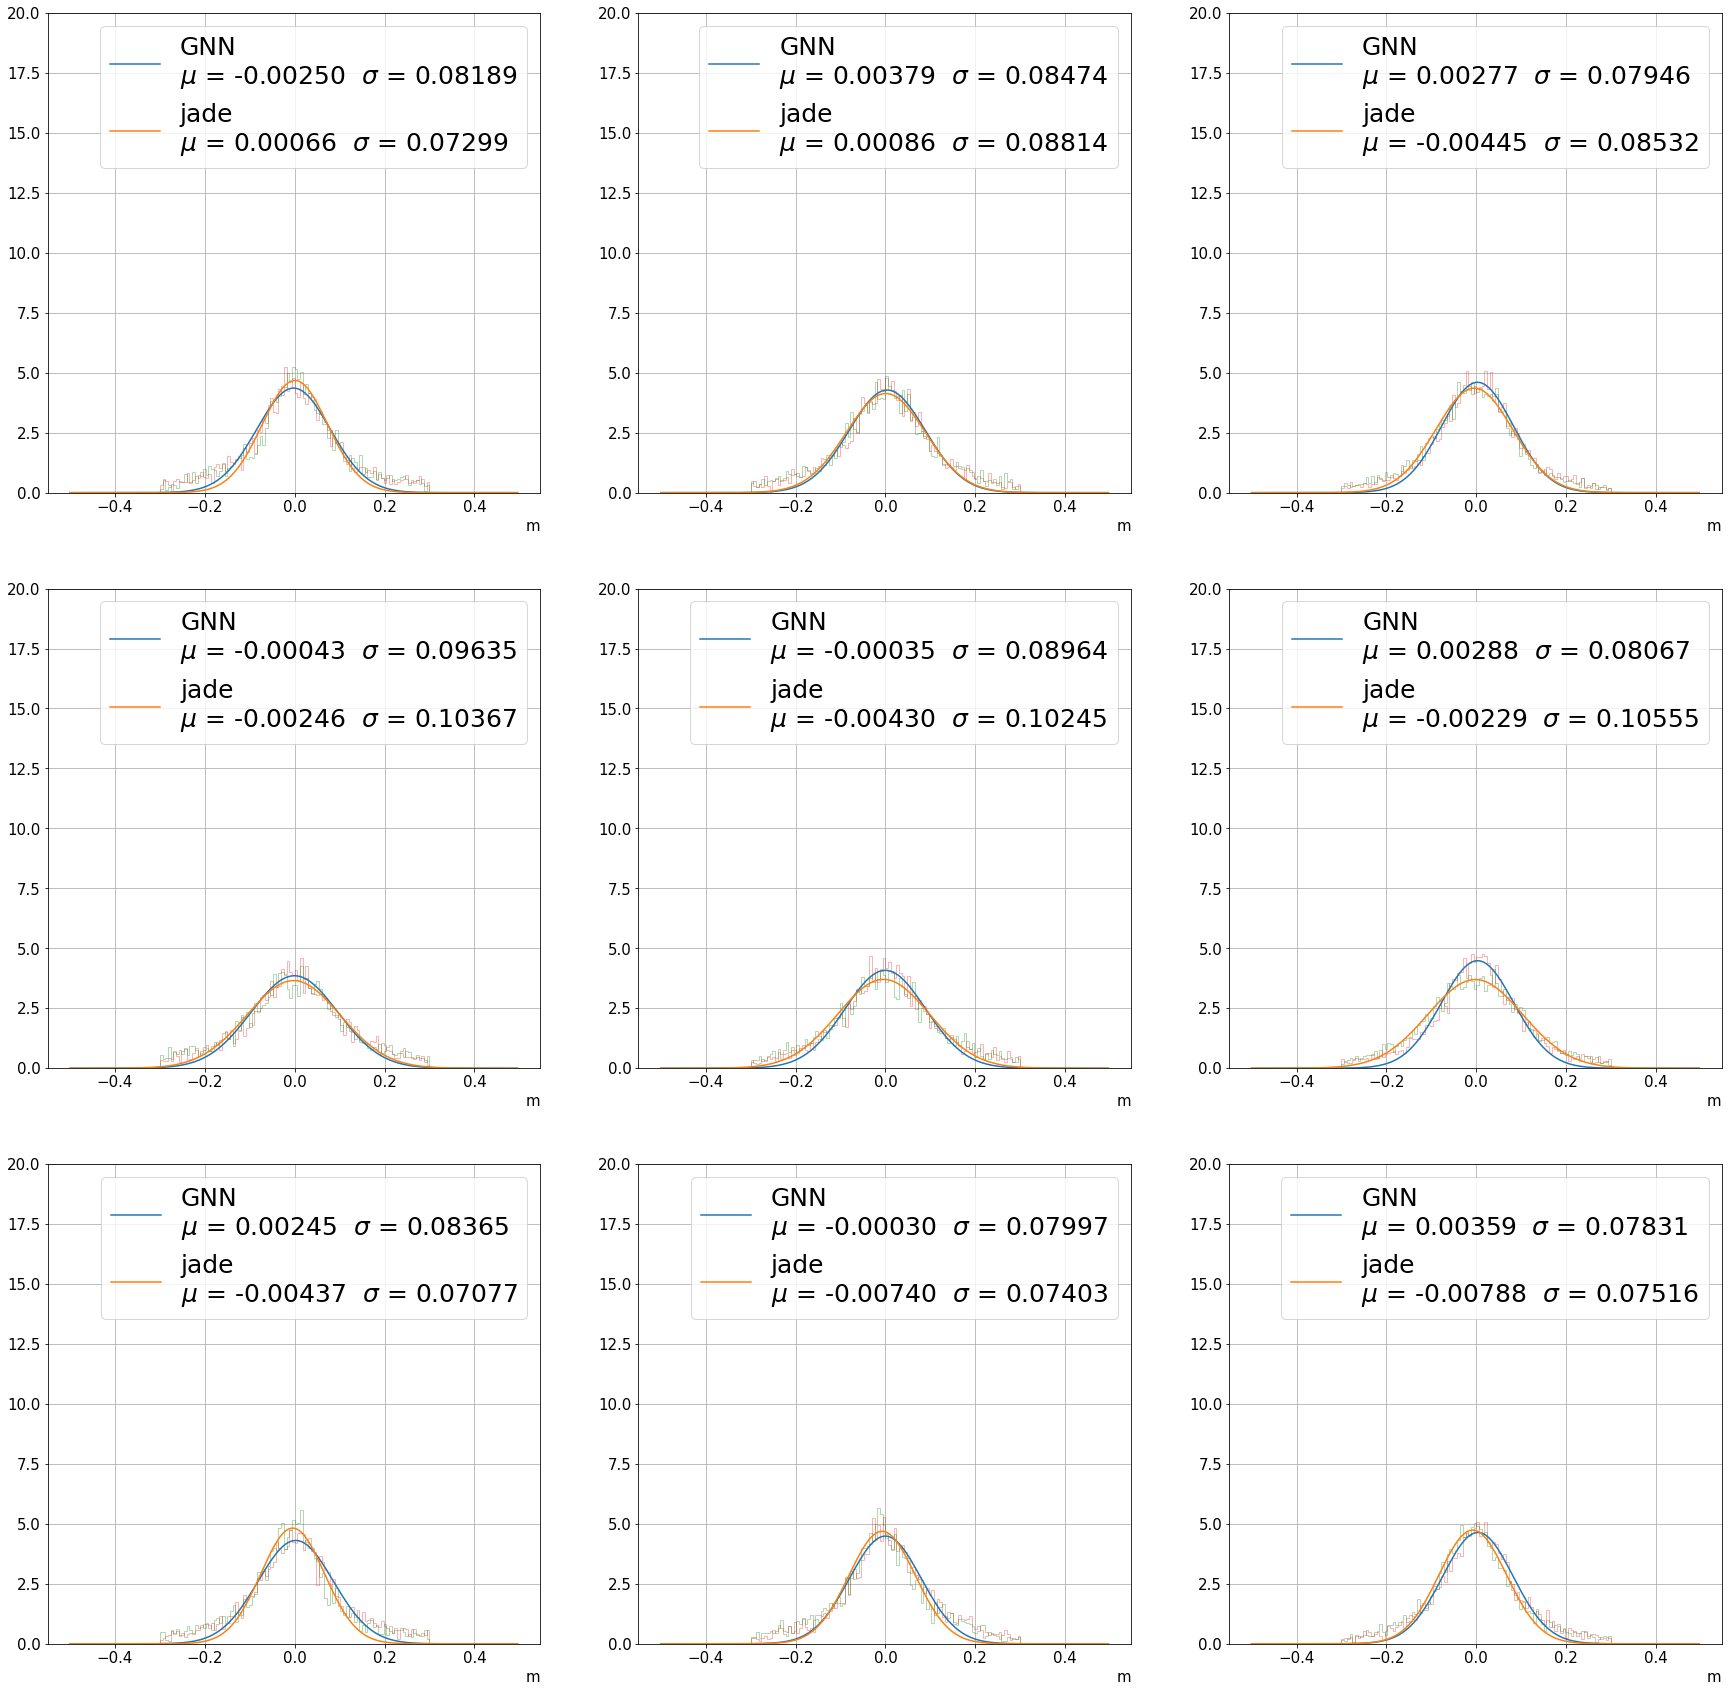

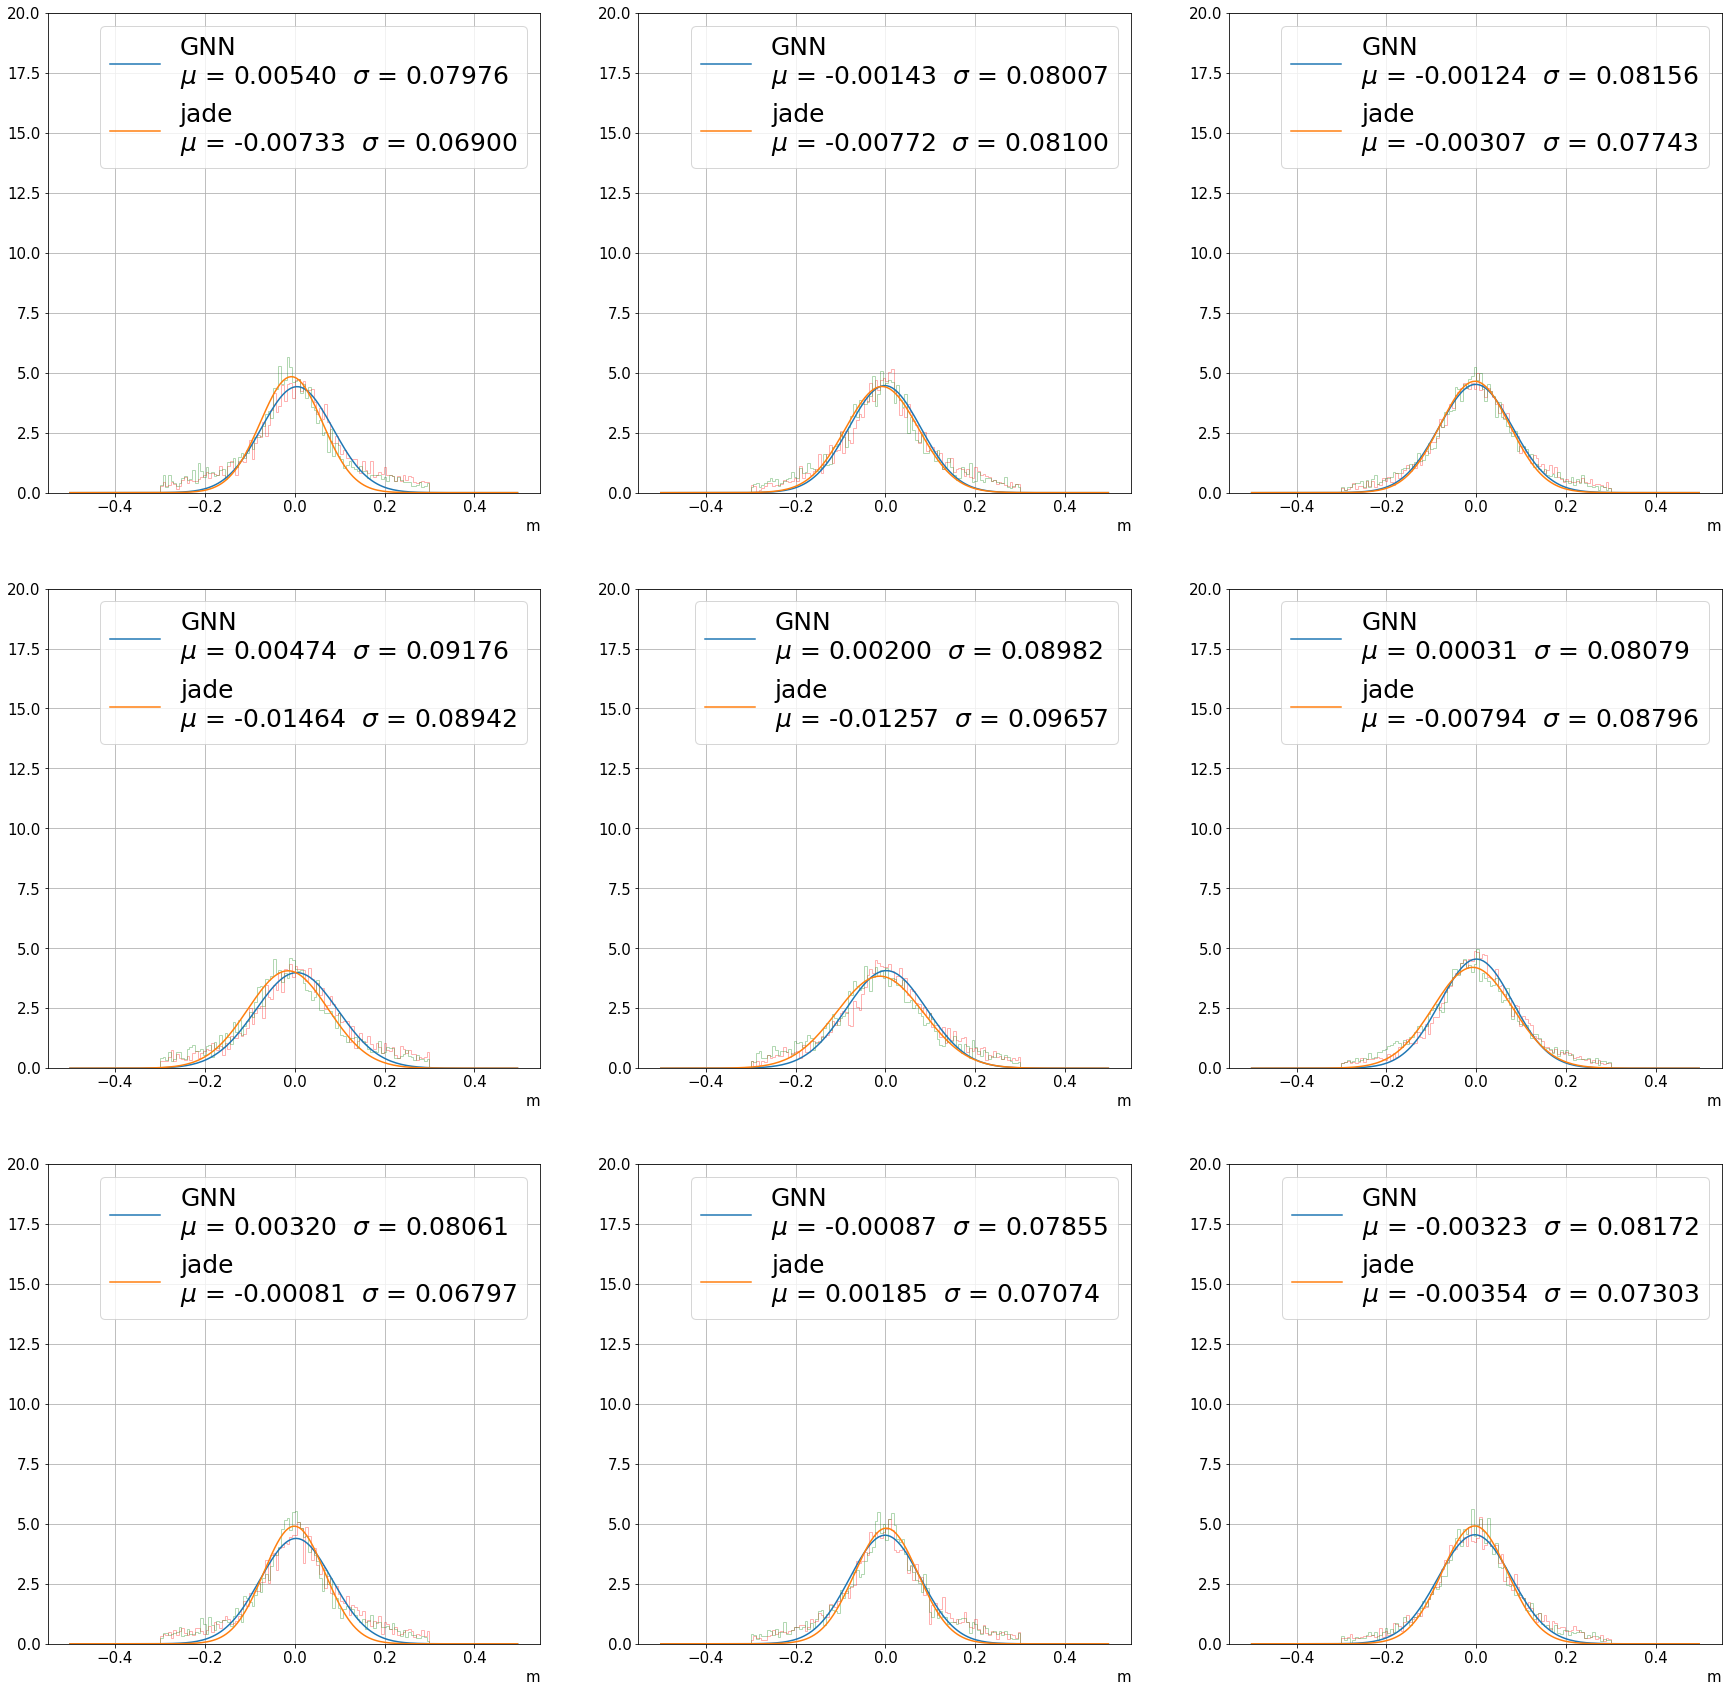

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


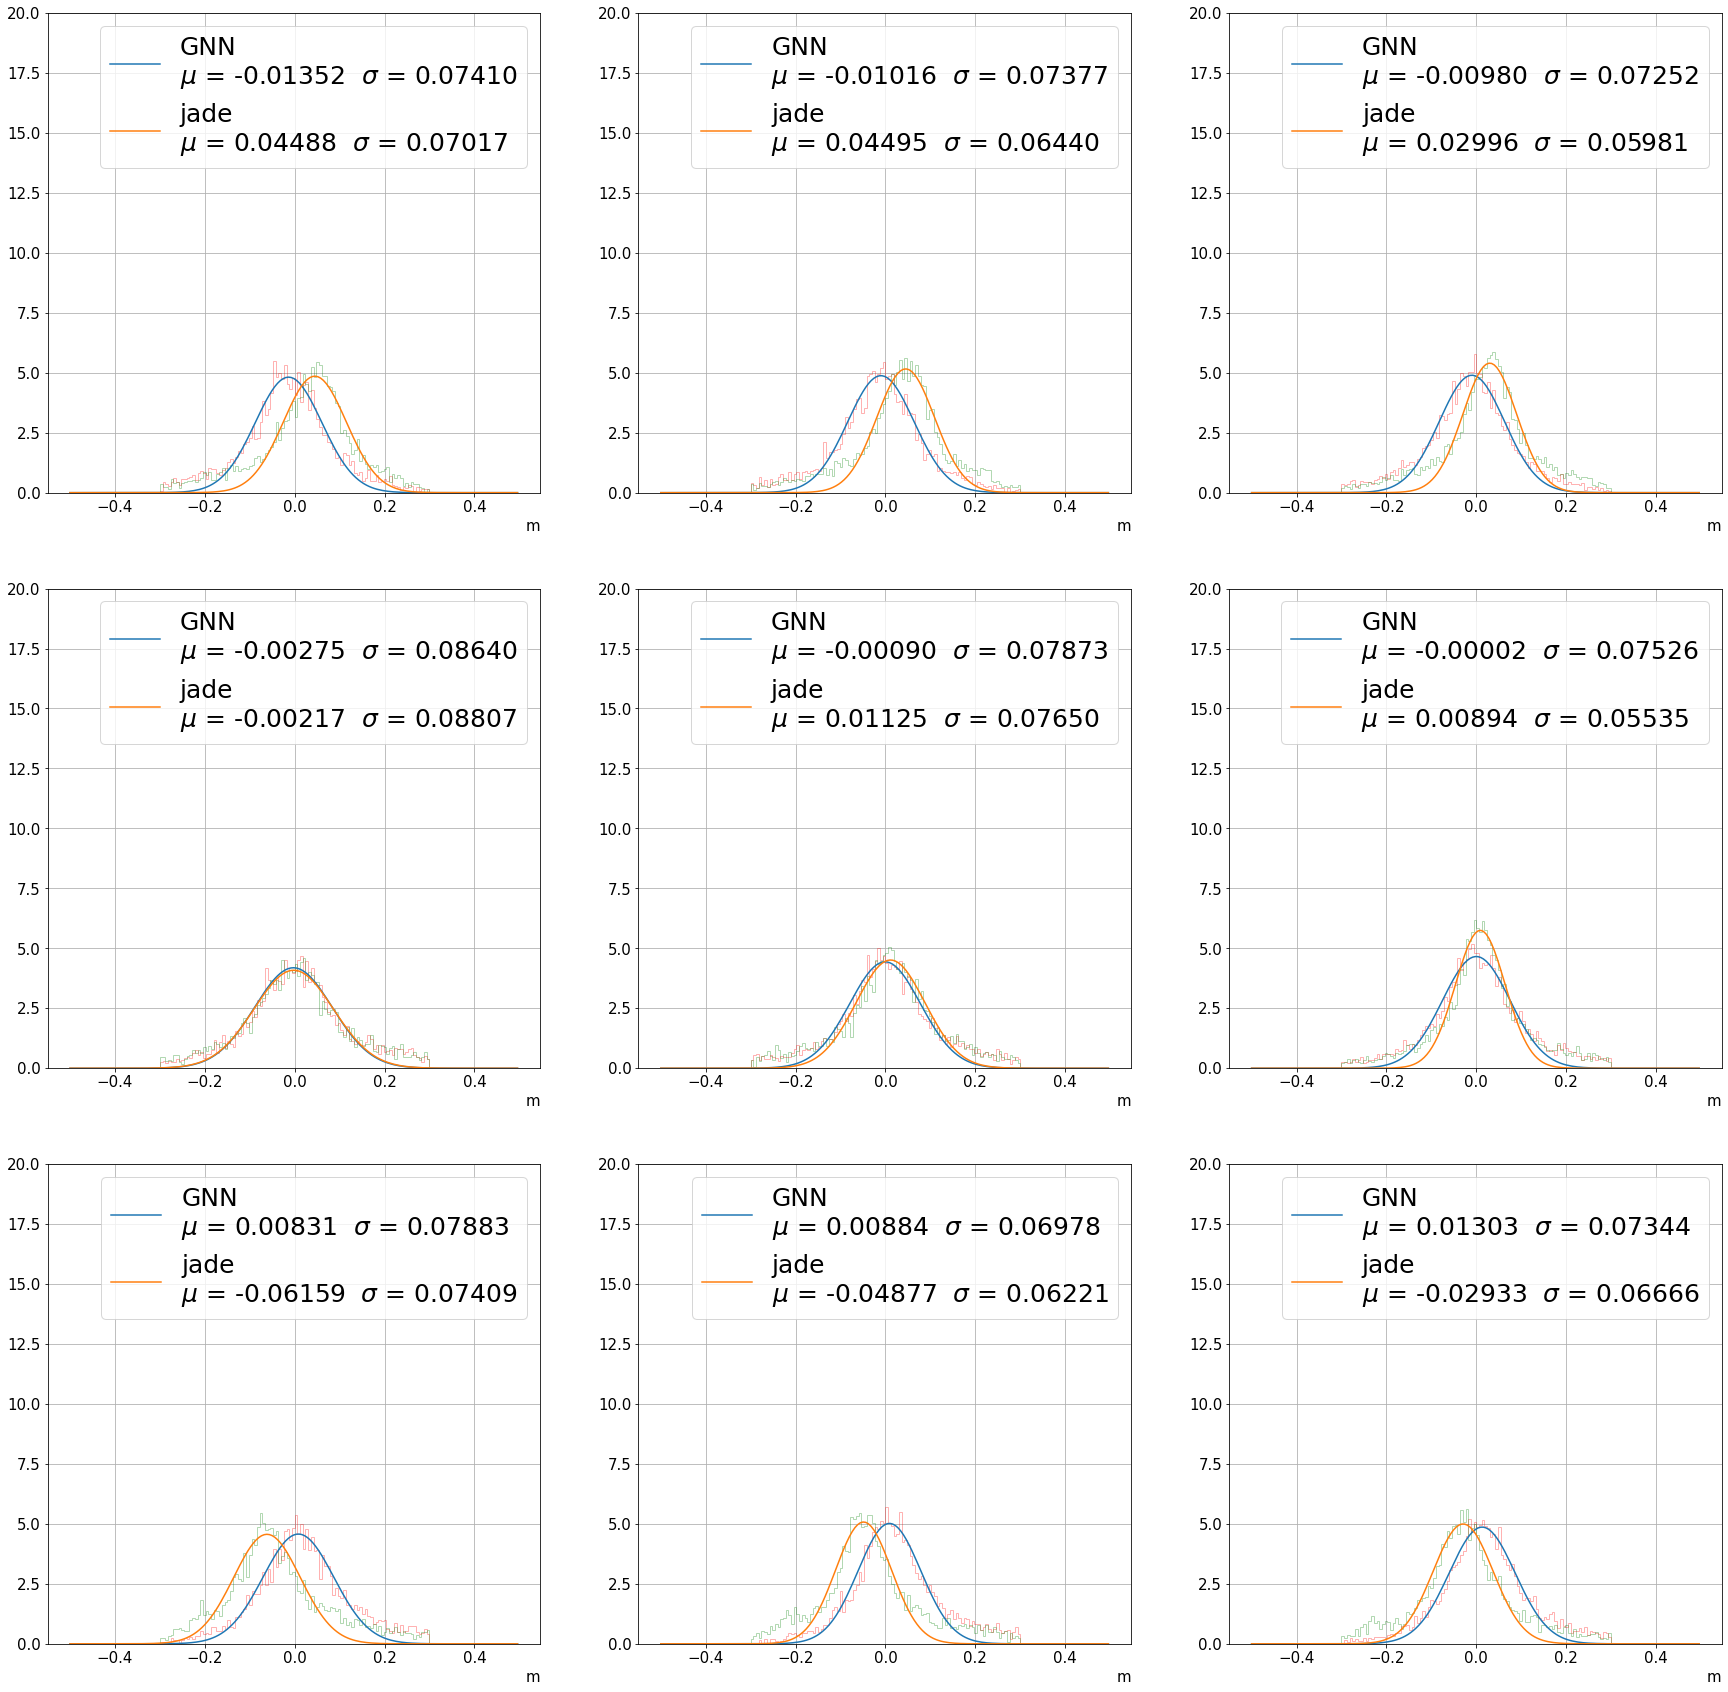

In [19]:
for ver in range(3):
##################
    plt.rcParams['figure.figsize'] = (30, 30)
    for k in range(3):
        for j in range(3):


            plt.subplot(3,3,3*k+(j+1))

            tmp_hist = plt.hist(pred[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.3, density = True, histtype = 'step')
            tmp_hist_jade = plt.hist(jade[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'g', alpha = 0.3, density = True, histtype = 'step')

            hist_N = tmp_hist[0]
            hist_x = []

            hist_N_jade = tmp_hist_jade[0]
            hist_x_jade = []

            for i in range(len(tmp_hist[1])-1):
                tmp = tmp_hist[1]
                hist_x.append((tmp[i] + tmp[i+1])/2.)
            hist_x = np.array(hist_x)

            for i in range(len(tmp_hist_jade [1])-1):
                tmp_jade  = tmp_hist_jade [1]
                hist_x_jade .append((tmp_jade [i] + tmp_jade [i+1])/2.)
            hist_x_jade  = np.array(hist_x_jade )

            popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
            hist_xx = np.arange(-0.5, 0.5,0.6/100.)


            popt_jade, pcov_jade = curve_fit(gaussian, hist_x_jade, hist_N_jade, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N_jade), absolute_sigma=True)
            hist_xx_jade = np.arange(-0.5, 0.5,0.6/100.)


            ##A = popt[0]; mu = popt[1]; sigma = popt[2]
        #         plt.title(r'$\Delta$X',fontsize = 25)
            plt.xticks(fontsize = 15)
            plt.yticks(fontsize = 15)

            plt.xlabel("m", fontsize=15, loc='right')
        #         plt.text(-0.3,15,'GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=10)
            plt.plot(hist_xx, gaussian(hist_xx,*popt),label='GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt[2]):.5f}")


        #         plt.text(0,15,'jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}",fontsize=10)
            plt.plot(hist_xx_jade, gaussian(hist_xx_jade,*popt_jade),label='jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}")
        #         plt.vlines(0,0,15,colors='red')
            plt.grid()
            plt.ylim([0,20])        
            plt.legend(fontsize = 25)
    plt.show()

In [20]:
RR = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)

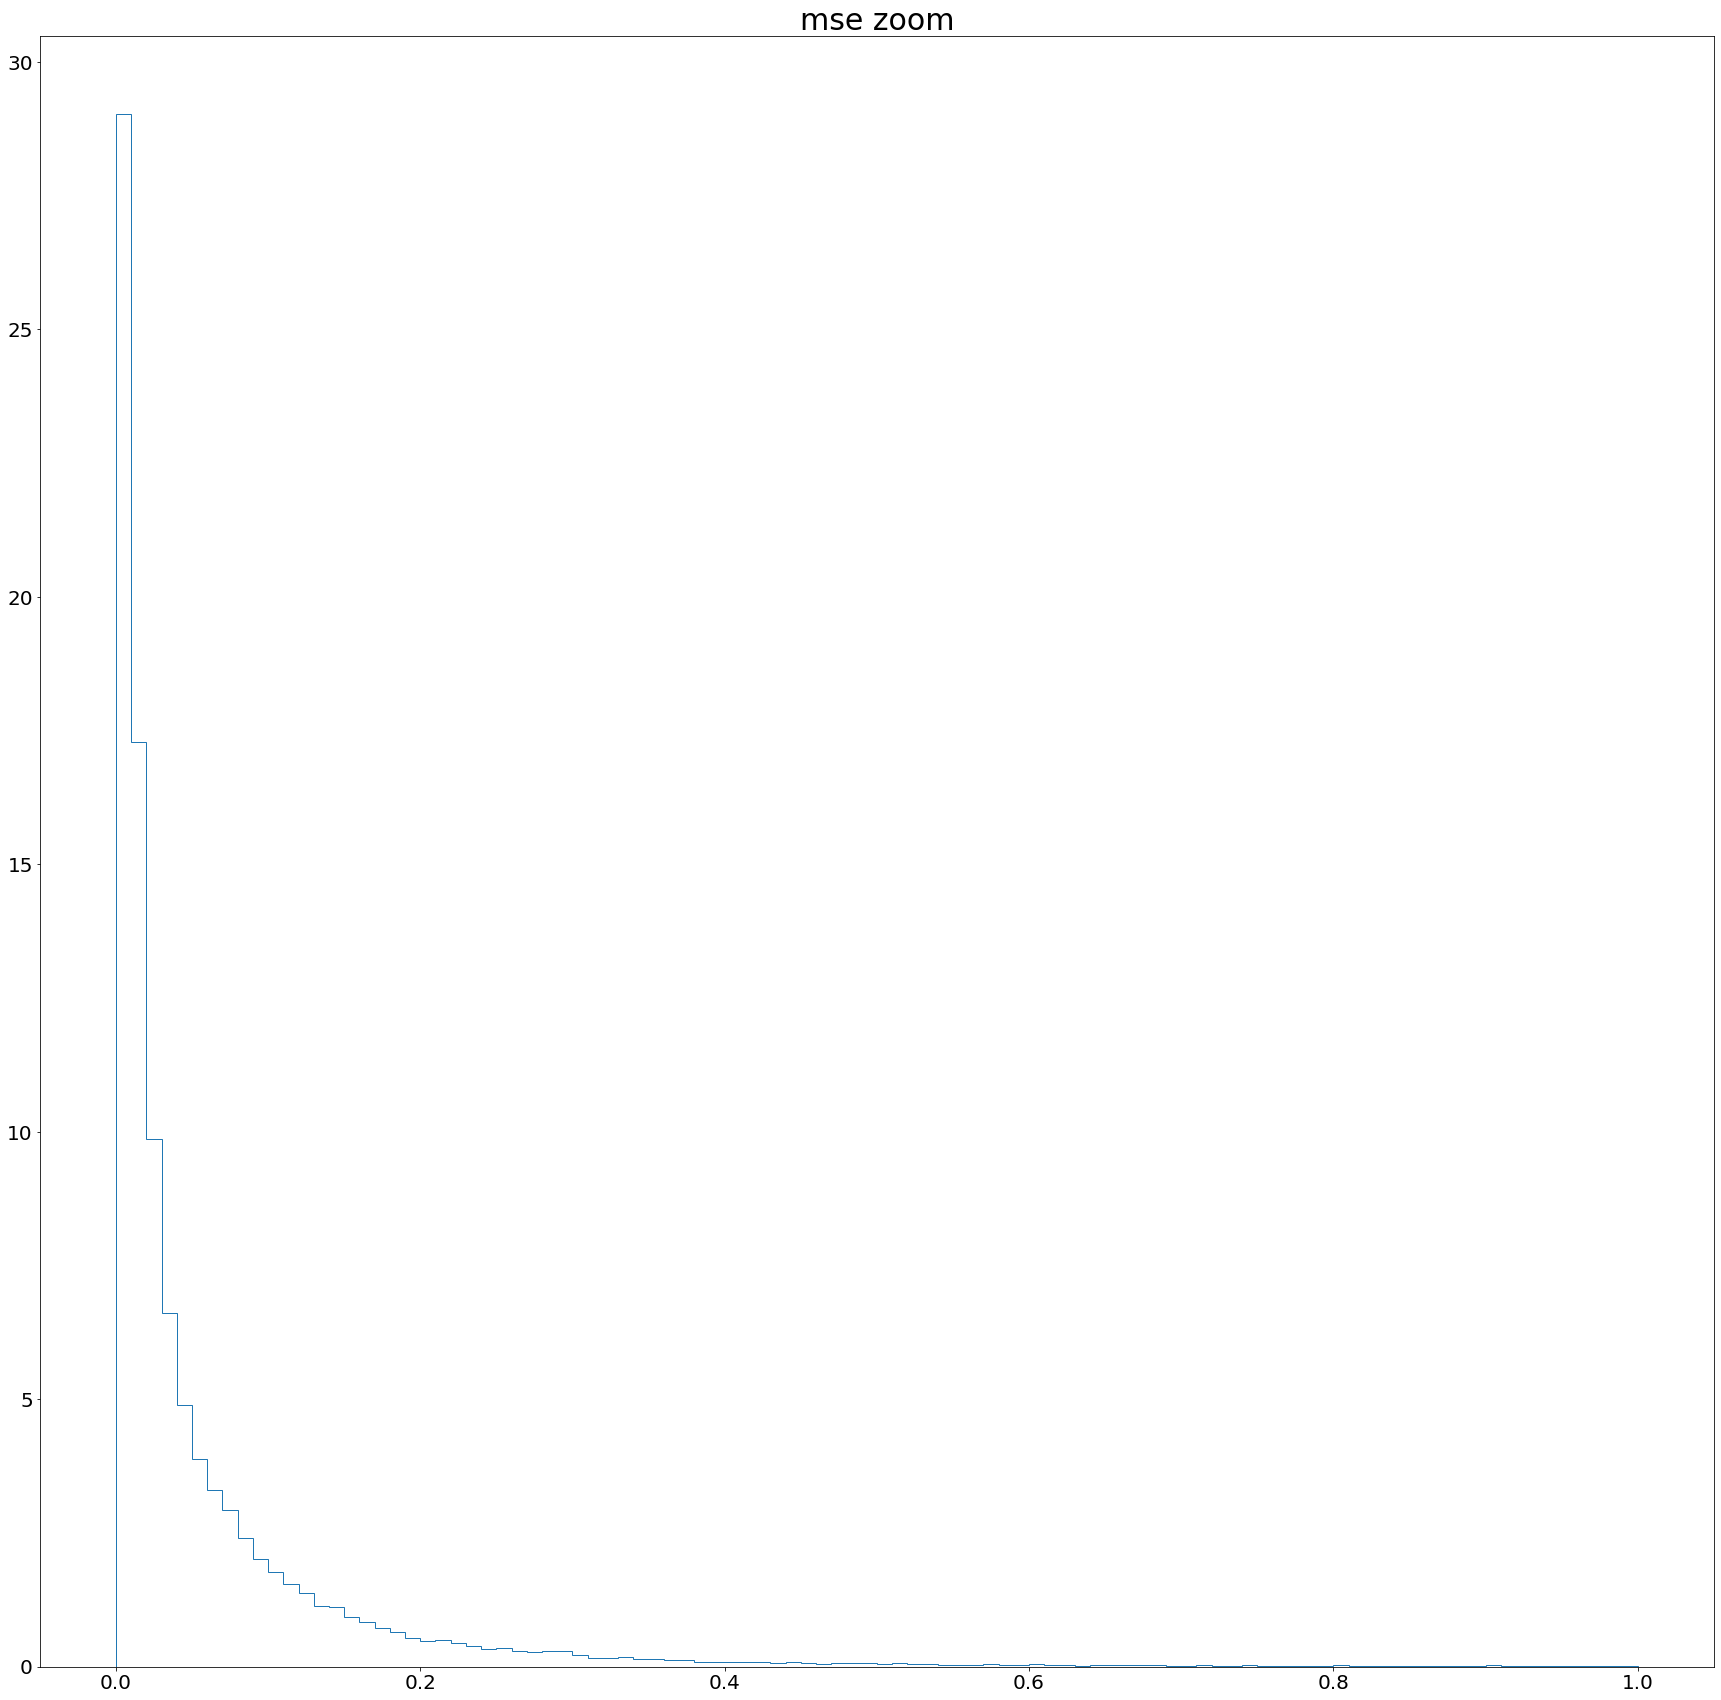

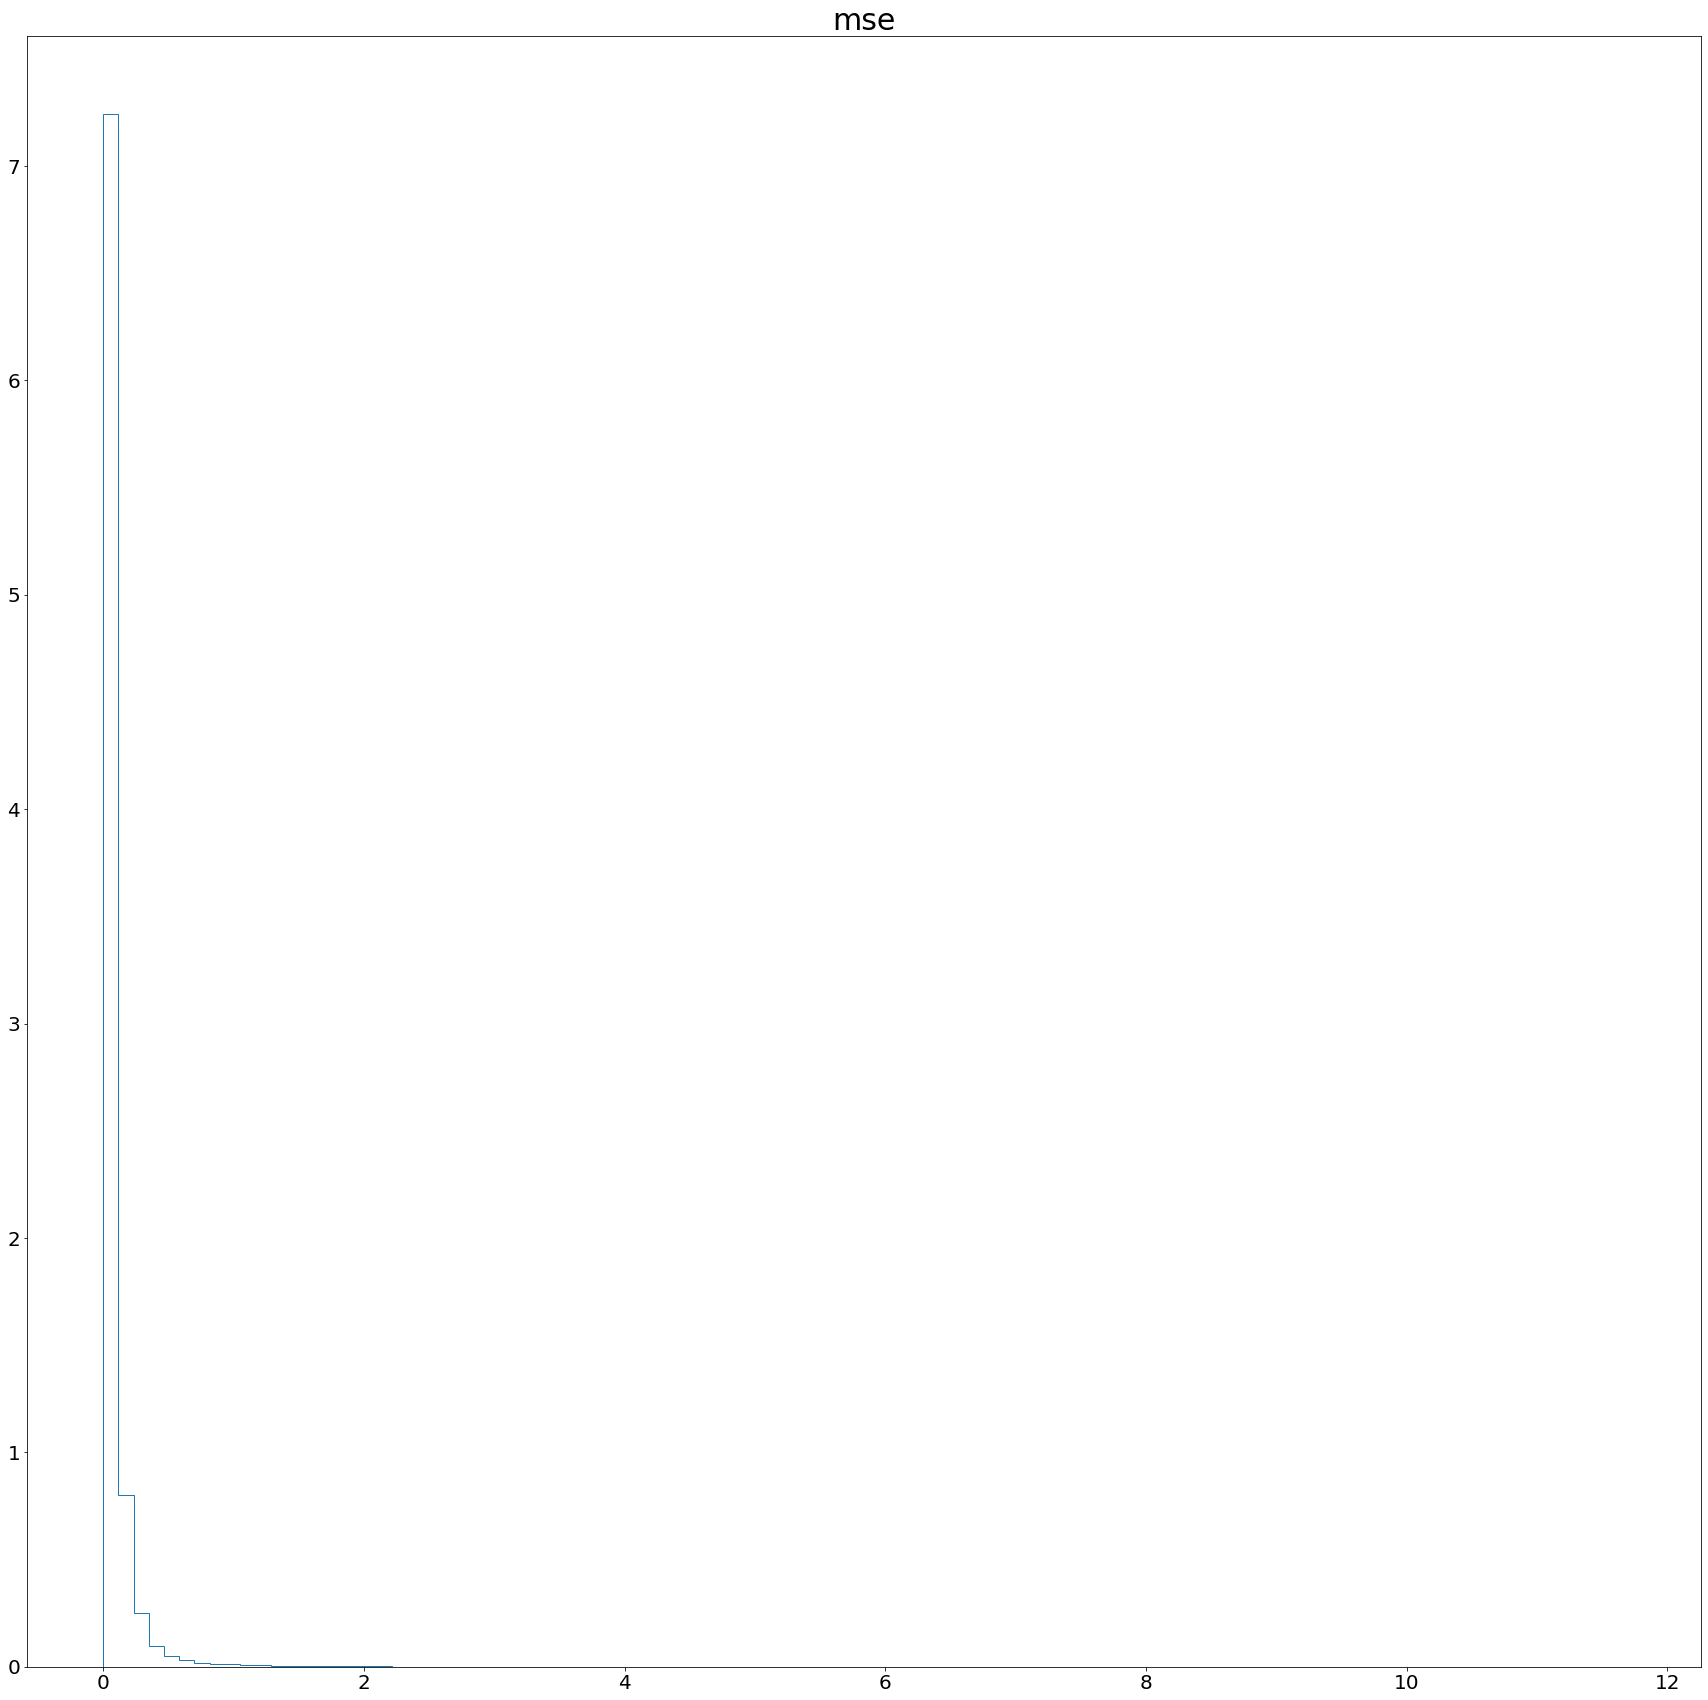

In [21]:
plt.hist(RR,bins=100,range=[0,1], density = True, histtype = 'step')
plt.title('mse zoom',fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()
plt.hist(RR,bins=100, density = True, histtype = 'step')
plt.title('mse',fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

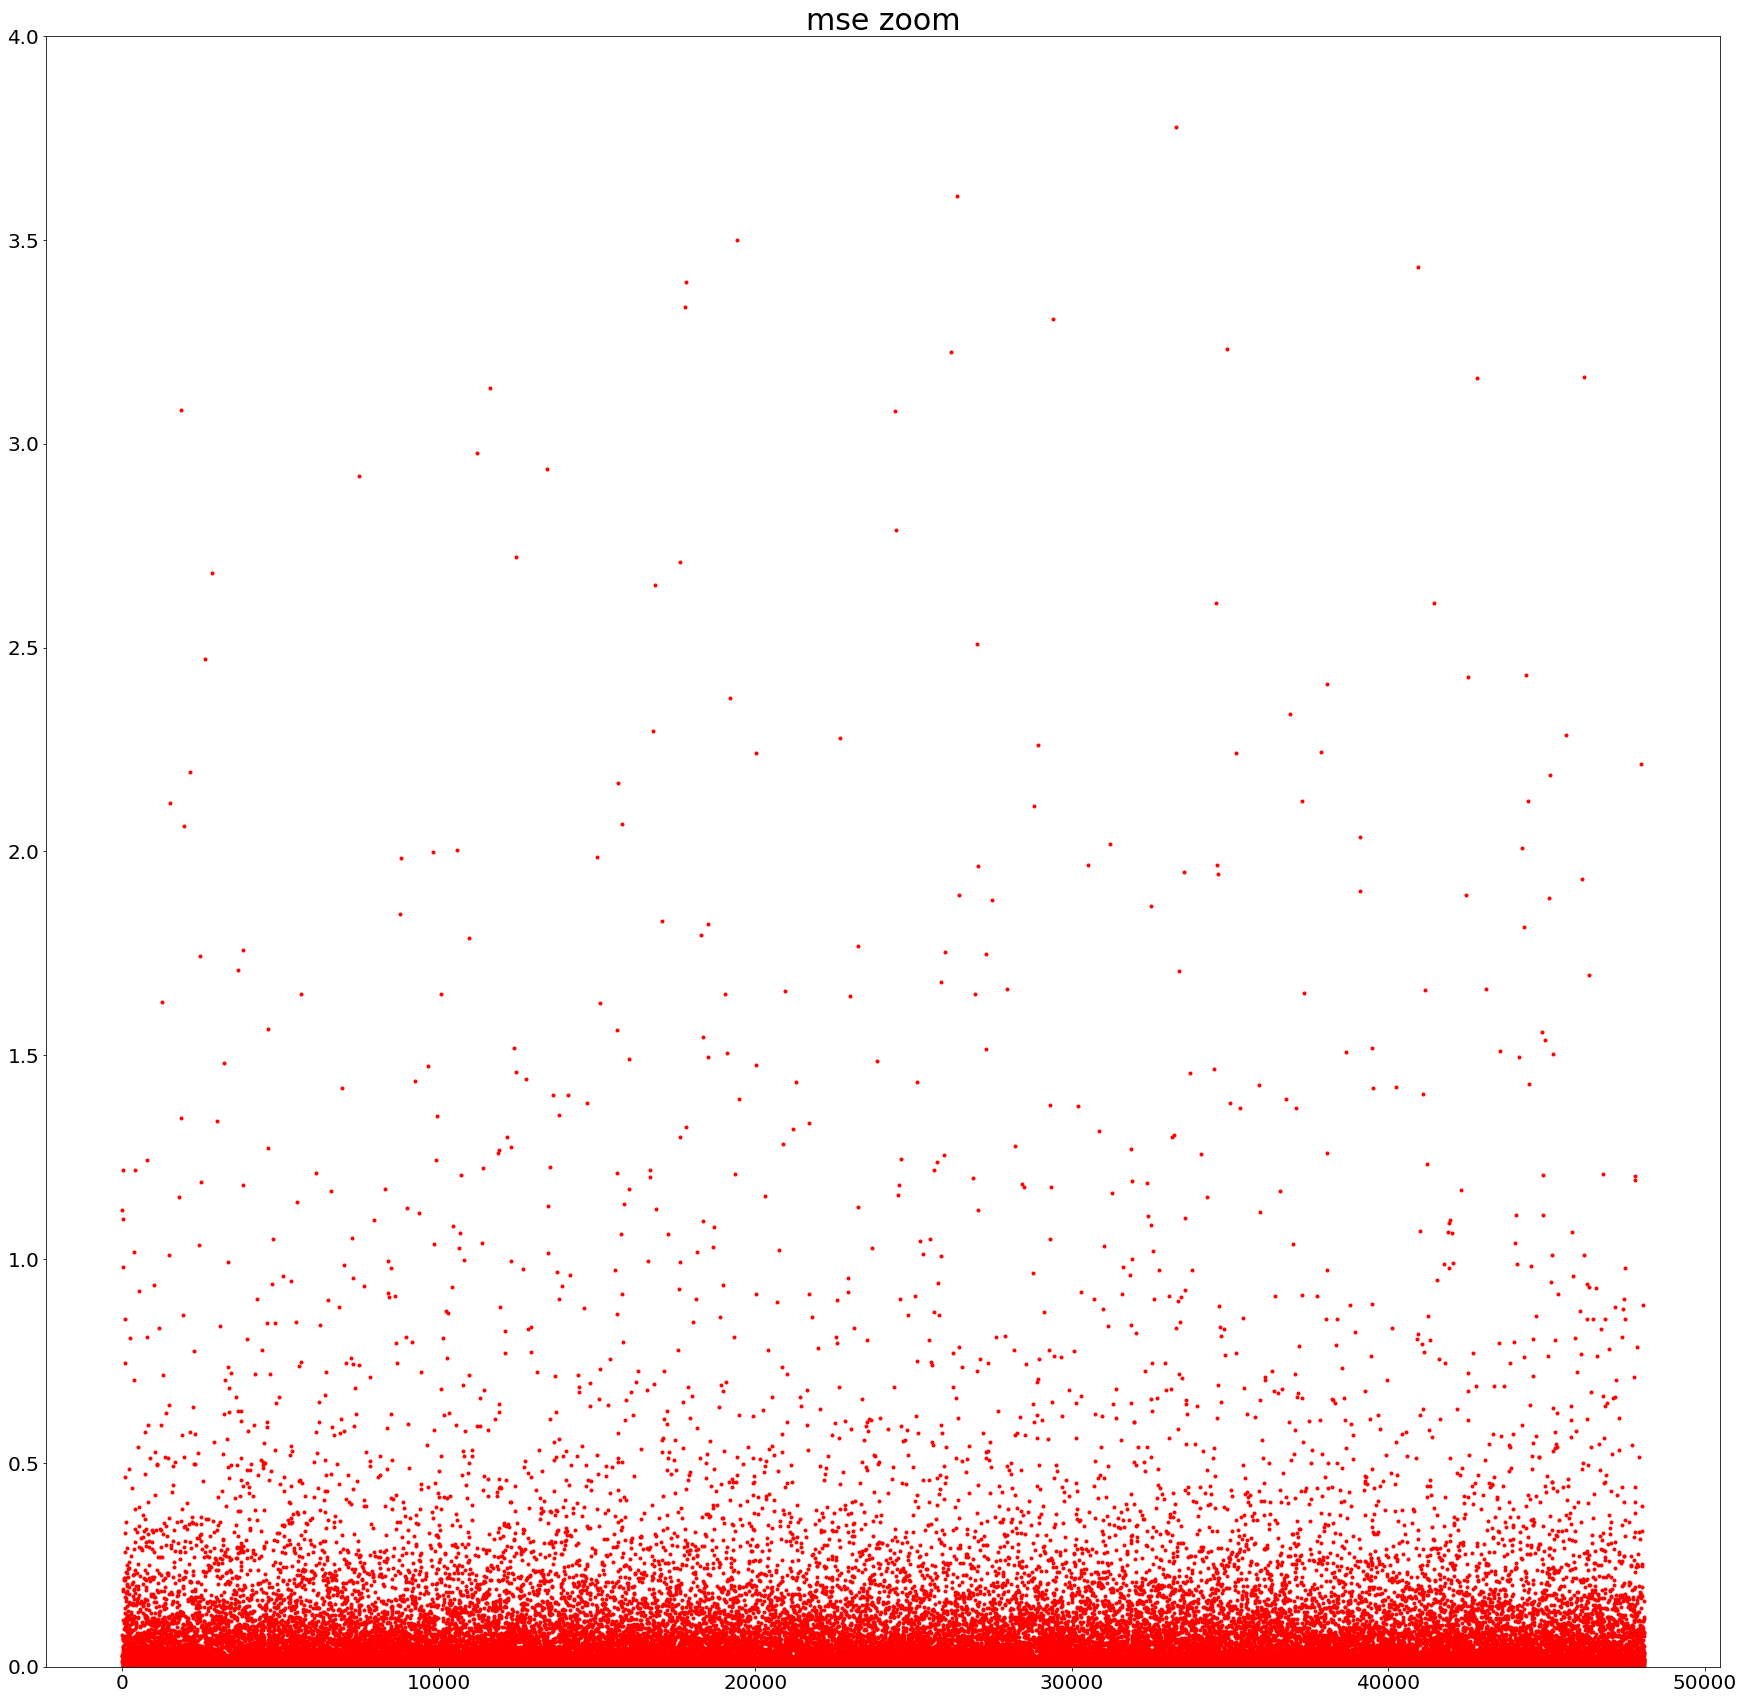

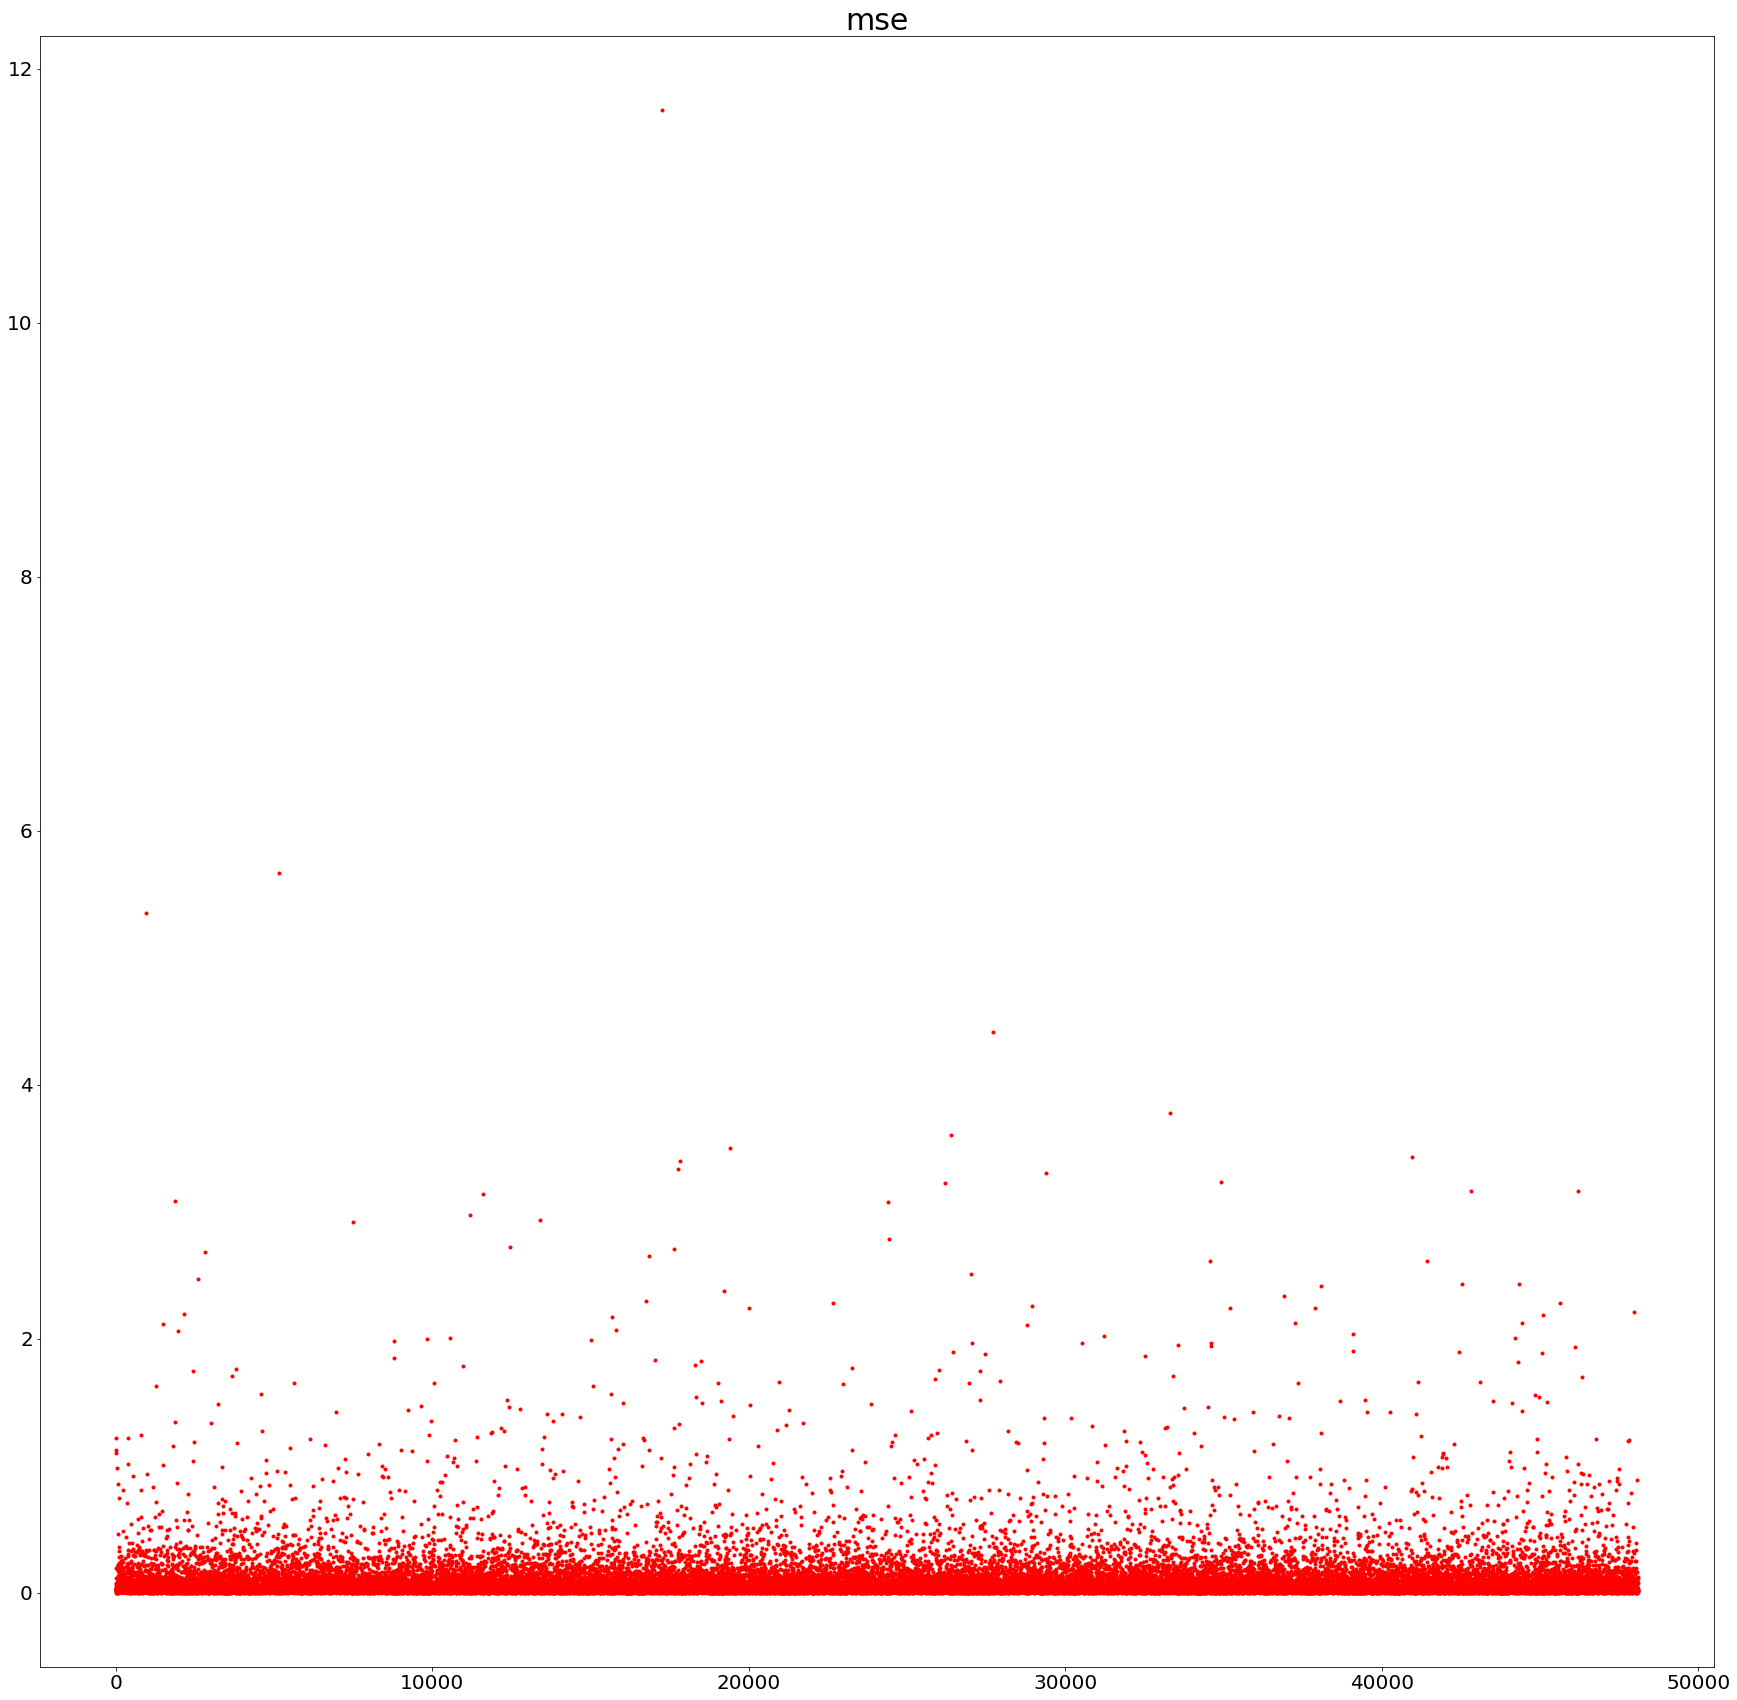

In [22]:
plt.plot(RR,'.r')
if geo == 1:
    plt.ylim([0,4])
elif geo == 2:
    plt.ylim([0,0.2])
elif geo == 3:
    plt.ylim([0,0.5])
plt.title('mse zoom',fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()
plt.plot(RR,'.r')
plt.title('mse',fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [23]:
from matplotlib.colors import LinearSegmentedColormap

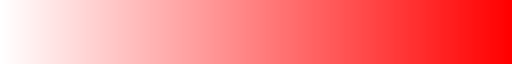

In [24]:
reds = ['#FFFFFF','#FF0000']
red_cmap = LinearSegmentedColormap.from_list('my_cmap',reds)
red_cmap


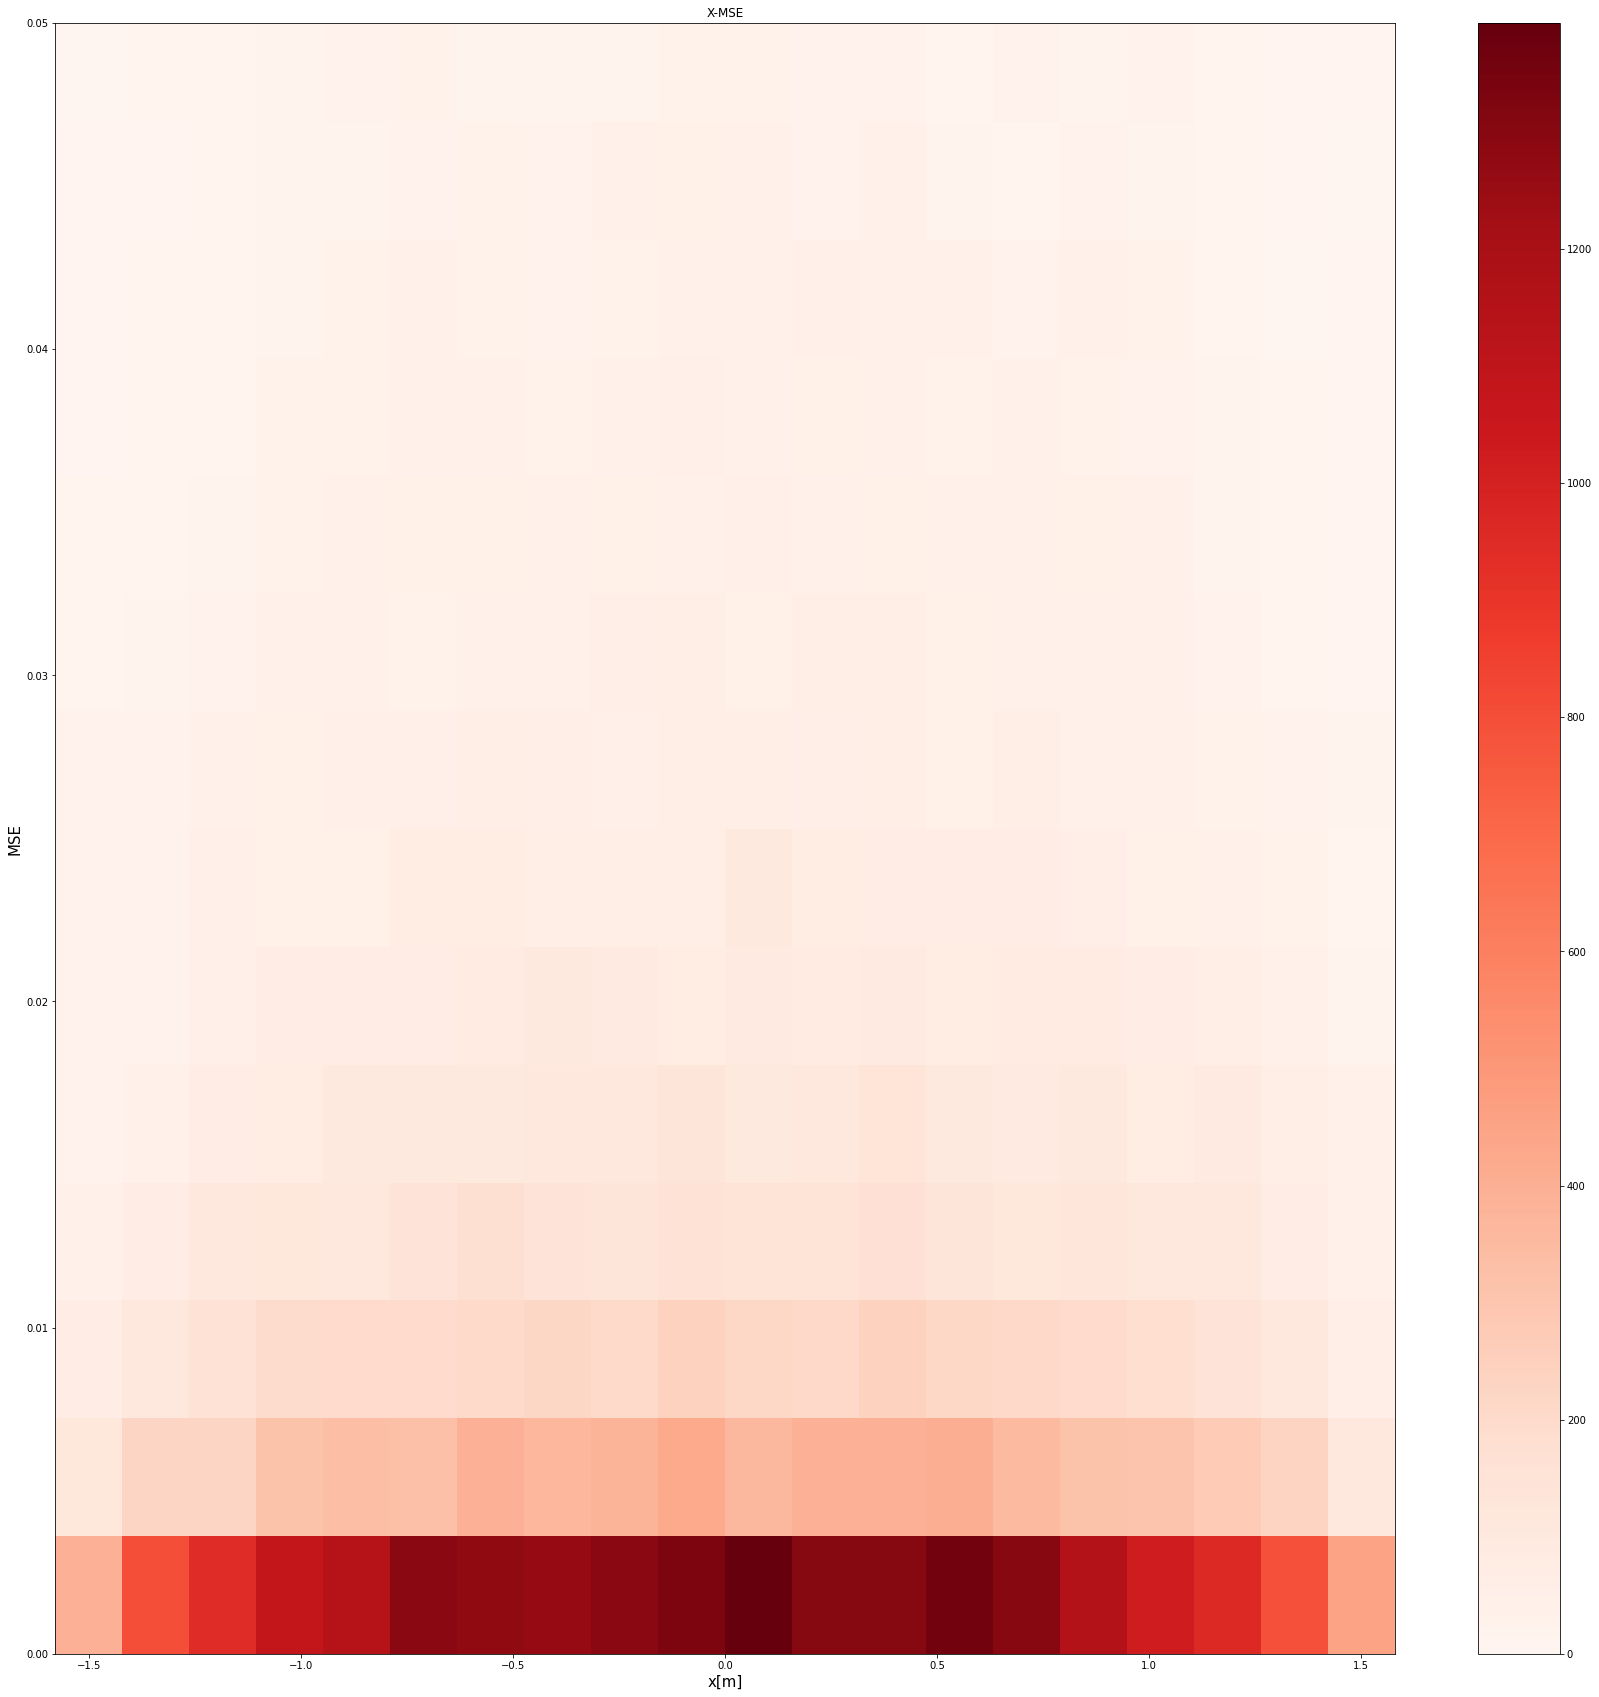

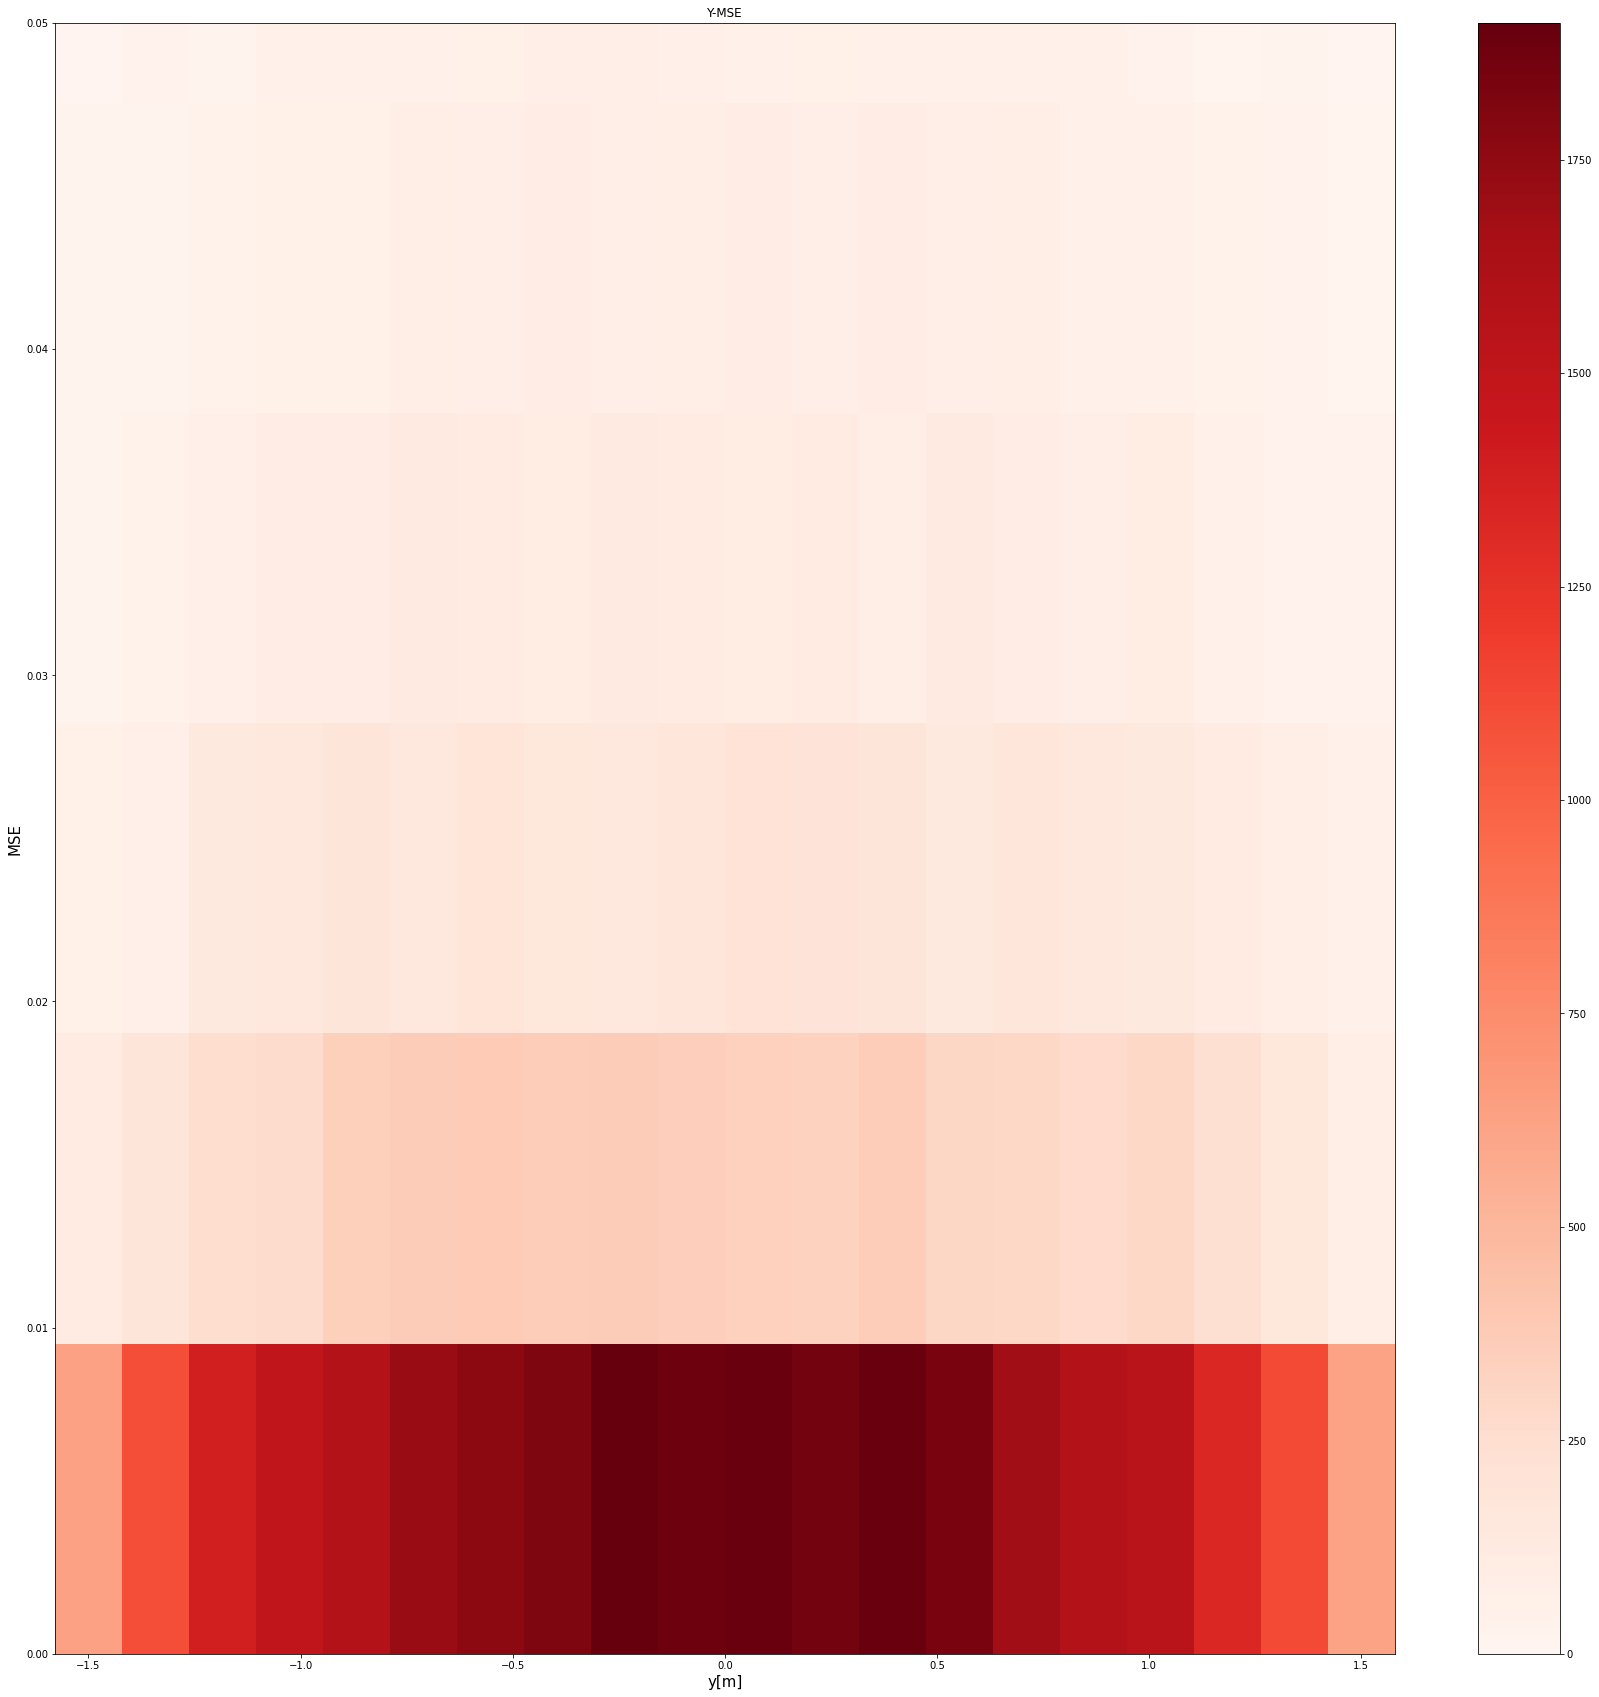

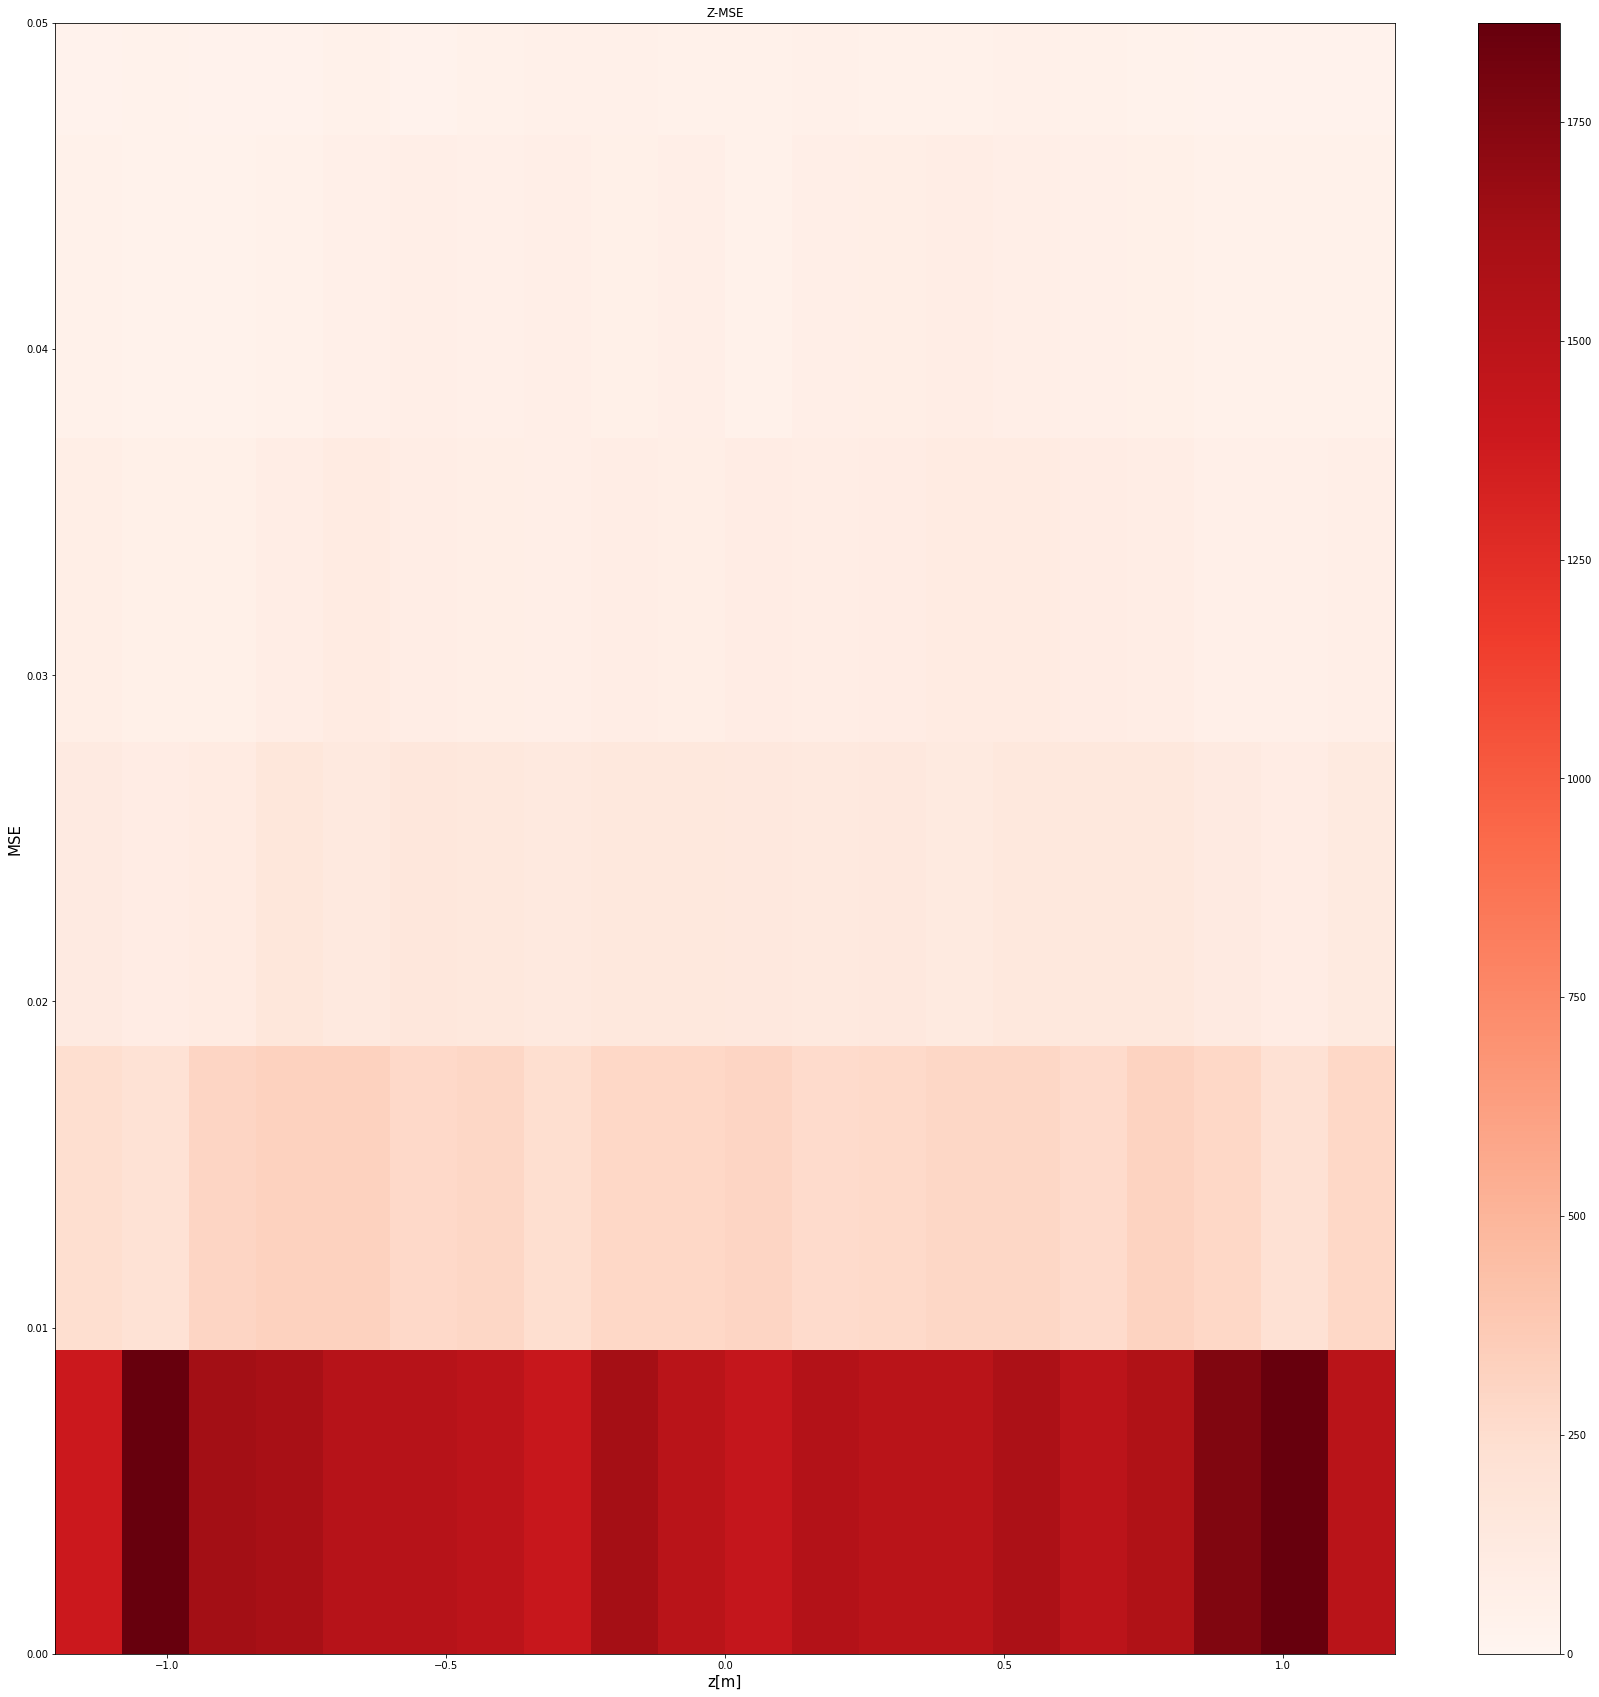

In [25]:
if geo == 1:
    plt.hist2d(label[:,0],np.power((pred[:,0] - label[:,0]),2),bins=(20,600),cmap='Reds')
    plt.title('X-MSE')
    plt.xlabel("x[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.05])
    plt.show()
    plt.hist2d(label[:,1],np.power((pred[:,1] - label[:,1]),2),bins=(20,600),cmap='Reds')
    plt.title('Y-MSE')
    plt.xlabel("y[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.05])
    plt.show()
    plt.hist2d(label[:,2],np.power((pred[:,2] - label[:,2]),2),bins=(20,600),cmap='Reds')
    plt.title('Z-MSE')
    plt.xlabel("z[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.05])
    plt.show()
elif geo == 2:

    plt.hist2d(label[:,0],np.power((pred[:,0] - label[:,0]),2),bins=(10,150),cmap='Reds')
    plt.title('X-MSE')
    plt.xlabel("x[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()
    plt.hist2d(label[:,1],np.power((pred[:,1] - label[:,1]),2),bins=(10,150),cmap='Reds')
    plt.title('Y-MSE')
    plt.xlabel("y[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()
    plt.hist2d(label[:,2],np.power((pred[:,2] - label[:,2]),2),bins=(10,150),cmap='Reds')
    plt.title('Z-MSE')
    plt.xlabel("z[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()
elif geo == 3:

    plt.hist2d(label[:,0],np.power((pred[:,0] - label[:,0]),2),bins=(10,500),cmap='Reds')
    plt.title('X-MSE')
    plt.xlabel("x[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()
    plt.hist2d(label[:,1],np.power((pred[:,1] - label[:,1]),2),bins=(10,1500),cmap='Reds')
    plt.title('Y-MSE')
    plt.xlabel("y[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()
    plt.hist2d(label[:,2],np.power((pred[:,2] - label[:,2]),2),bins=(10,500),cmap='Reds')
    plt.title('Z-MSE')
    plt.xlabel("z[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()

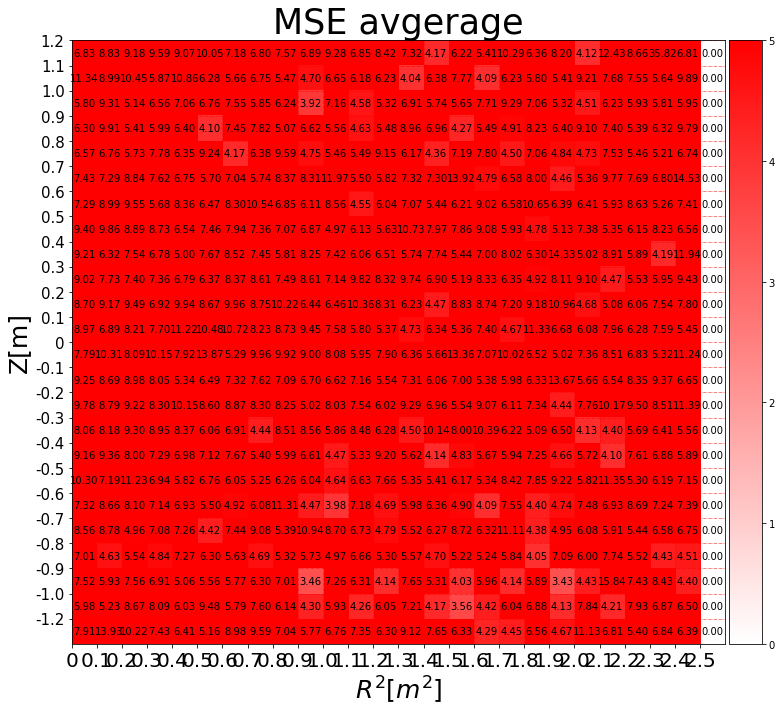

In [26]:
if geo == 1:
    maxvalue = 5
elif geo == 2:
    maxvalue = 0.1
elif geo == 3:
    maxvalue = 1

R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,1):
    for i in range(0,26,1):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.1) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.1)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append(np.average(np.array(test)))
   

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,26)*100, cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-0.5, 25, 1))
ax.set_yticks(np.arange(-0.5, 23, 1))
ax.set_xticklabels(['0','0.1','0.2','0.3','0.4',
                    '0.5','0.6','0.7','0.8','0.9',
                    '1.0','1.1','1.2','1.3','1.4',
                    '1.5','1.6','1.7','1.8','1.9',
                    '2.0','2.1','2.2','2.3','2.4','2.5'],fontsize=20)
ax.set_yticklabels(['1.2','1.1','1.0','0.9','0.8',
                    '0.7','0.6','0.5','0.4','0.3',
                    '0.2','0.1','0','-0.1','-0.2',
                    '-0.3','-0.4','-0.5','-0.6','-0.7',
                    '-0.8','-0.9','-1.0','-1.2'],fontsize=15)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(24):
    for j in range(26):
        aaa = np.array(ME_eff).reshape(-1,26)[i, j]
        
        text = ax.text(j, i, f"{aaa*100:.2f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE avgerage",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



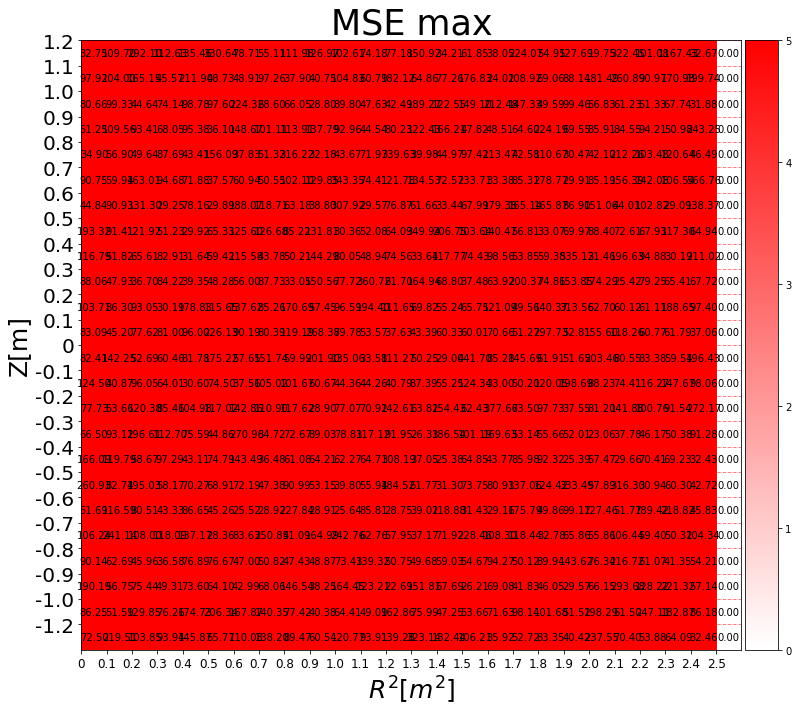

In [27]:
if geo == 1:
    maxvalue = 5
elif geo == 2:
    maxvalue = 0.1
elif geo == 3:
    maxvalue = 1

R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,1):
    for i in range(0,26,1):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.1) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.1)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
#             ME_eff.append(np.average(np.array(test)))
            ME_eff.append(np.array(test).max())

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,26)*100, cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-0.5, 25, 1))
ax.set_yticks(np.arange(-0.5, 23, 1))
ax.set_xticklabels(['0','0.1','0.2','0.3','0.4',
                    '0.5','0.6','0.7','0.8','0.9',
                    '1.0','1.1','1.2','1.3','1.4',
                    '1.5','1.6','1.7','1.8','1.9',
                    '2.0','2.1','2.2','2.3','2.4','2.5'],fontsize=12)
ax.set_yticklabels(['1.2','1.1','1.0','0.9','0.8',
                    '0.7','0.6','0.5','0.4','0.3',
                    '0.2','0.1','0','-0.1','-0.2',
                    '-0.3','-0.4','-0.5','-0.6','-0.7',
                    '-0.8','-0.9','-1.0','-1.2'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(24):
    for j in range(26):
        aaa = np.array(ME_eff).reshape(-1,26)[i, j]
        
        text = ax.text(j, i, f"{aaa*100:.2f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE max",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



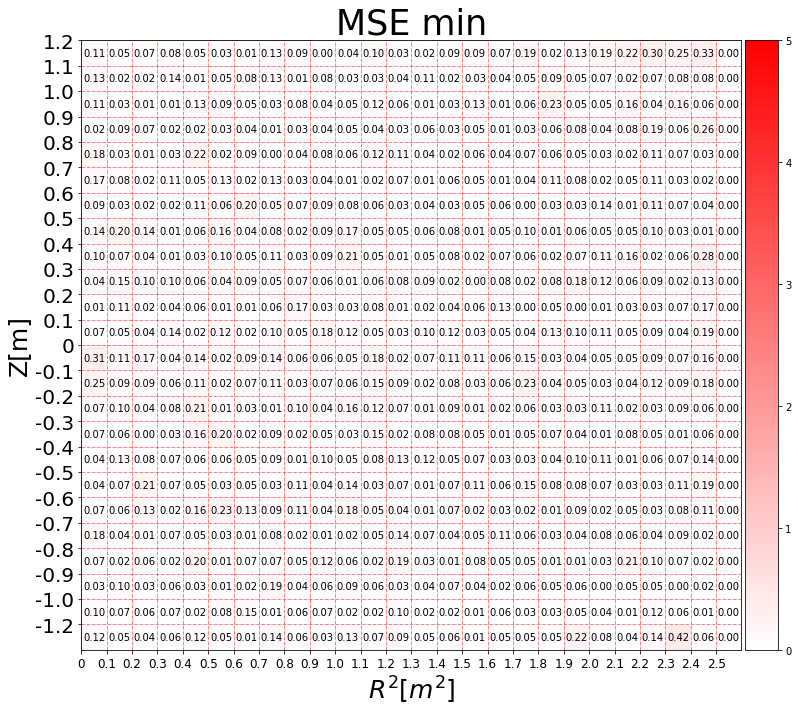

In [28]:
if geo == 1:
    maxvalue = 5
elif geo == 2:
    maxvalue = 0.1
elif geo == 3:
    maxvalue = 1

R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,1):
    for i in range(0,26,1):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.1) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.1)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
#             ME_eff.append(np.average(np.array(test)))
            ME_eff.append(np.array(test).min())

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,26)*100, cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-0.5, 25, 1))
ax.set_yticks(np.arange(-0.5, 23, 1))
ax.set_xticklabels(['0','0.1','0.2','0.3','0.4',
                    '0.5','0.6','0.7','0.8','0.9',
                    '1.0','1.1','1.2','1.3','1.4',
                    '1.5','1.6','1.7','1.8','1.9',
                    '2.0','2.1','2.2','2.3','2.4','2.5'],fontsize=12)
ax.set_yticklabels(['1.2','1.1','1.0','0.9','0.8',
                    '0.7','0.6','0.5','0.4','0.3',
                    '0.2','0.1','0','-0.1','-0.2',
                    '-0.3','-0.4','-0.5','-0.6','-0.7',
                    '-0.8','-0.9','-1.0','-1.2'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(24):
    for j in range(26):
        aaa = np.array(ME_eff).reshape(-1,26)[i, j]
        
        text = ax.text(j, i, f"{aaa*100:.2f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE min",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



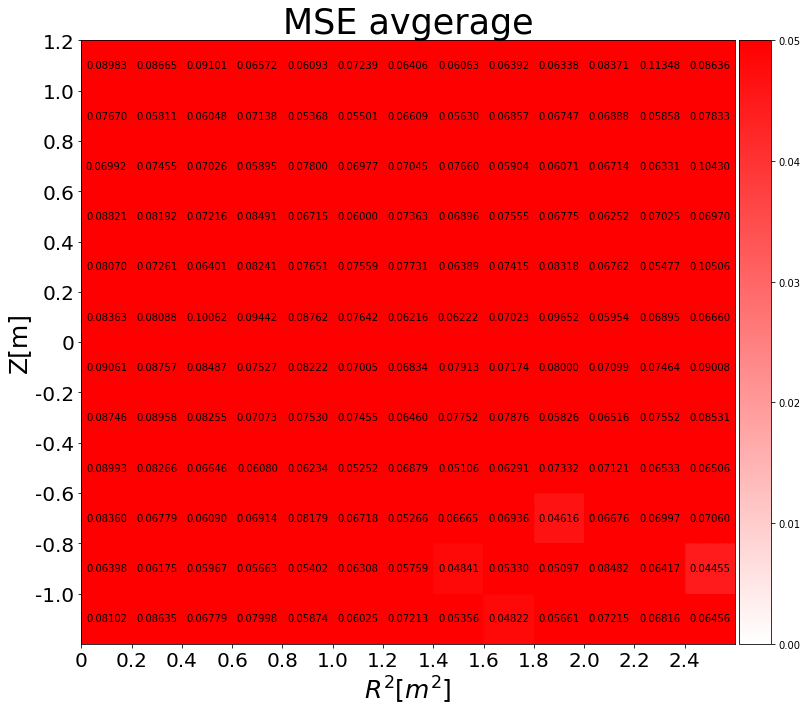

In [29]:
if geo == 1:
    maxvalue = 0.05
elif geo == 2:
    maxvalue = 0.1
elif geo == 3:
    maxvalue = 1

R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,2):
    for i in range(0,26,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.2)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append(np.average(np.array(test)))
   

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,13), cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-.5, 12, 1))
ax.set_yticks(np.arange(-.5, 11, 1))
ax.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8','2.0','2.2','2.4'],fontsize=20)
ax.set_yticklabels(['1.2','1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8','-1.0'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(12):
    for j in range(13):
        aaa = np.array(ME_eff).reshape(-1,13)[i, j]
        text = ax.text(j, i, f"{aaa:.5f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE avgerage",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



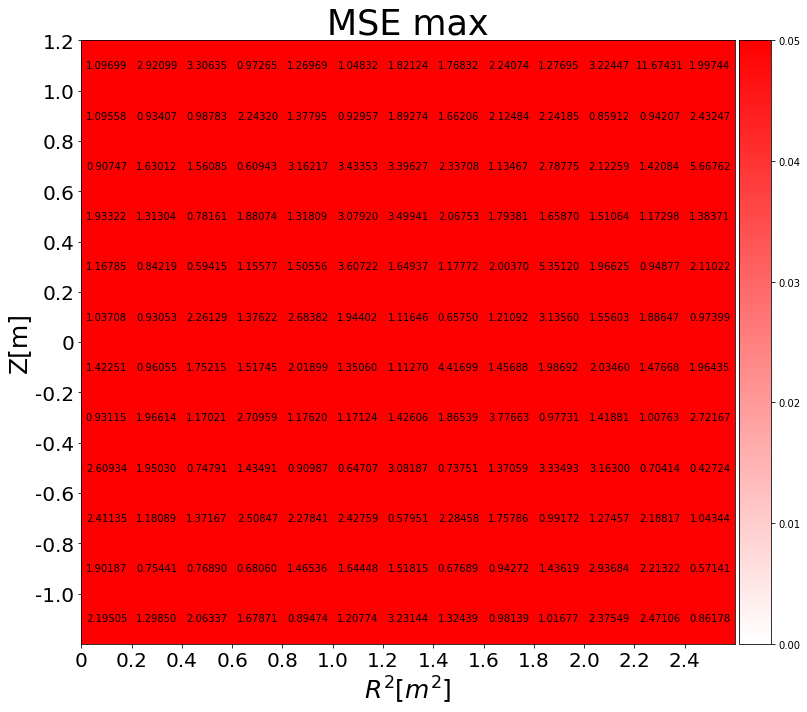

In [30]:


R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,2):
    for i in range(0,26,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.2)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append(np.array(test).max())
   

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,13), cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-.5, 12, 1))
ax.set_yticks(np.arange(-.5, 11, 1))
ax.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8','2.0','2.2','2.4'],fontsize=20)
ax.set_yticklabels(['1.2','1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8','-1.0'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(12):
    for j in range(13):
        aaa = np.array(ME_eff).reshape(-1,13)[i, j]
        text = ax.text(j, i, f"{aaa:.5f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE max",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



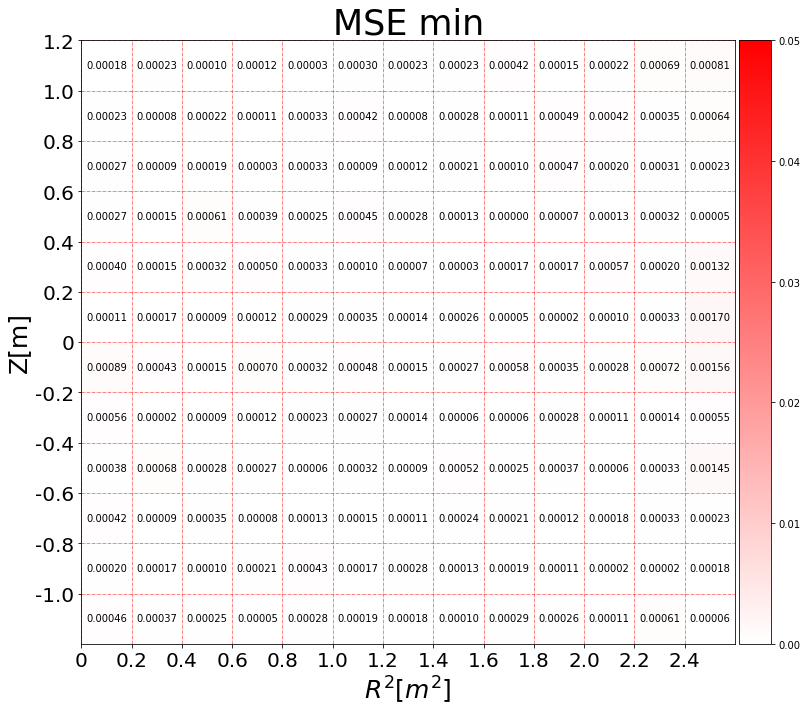

In [31]:


R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,2):
    for i in range(0,26,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.2)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append(np.array(test).min())
   

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,13), cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-.5, 12, 1))
ax.set_yticks(np.arange(-.5, 11, 1))
ax.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8','2.0','2.2','2.4'],fontsize=20)
ax.set_yticklabels(['1.2','1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8','-1.0'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(12):
    for j in range(13):
        aaa = np.array(ME_eff).reshape(-1,13)[i, j]
        text = ax.text(j, i, f"{aaa:.5f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE min",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



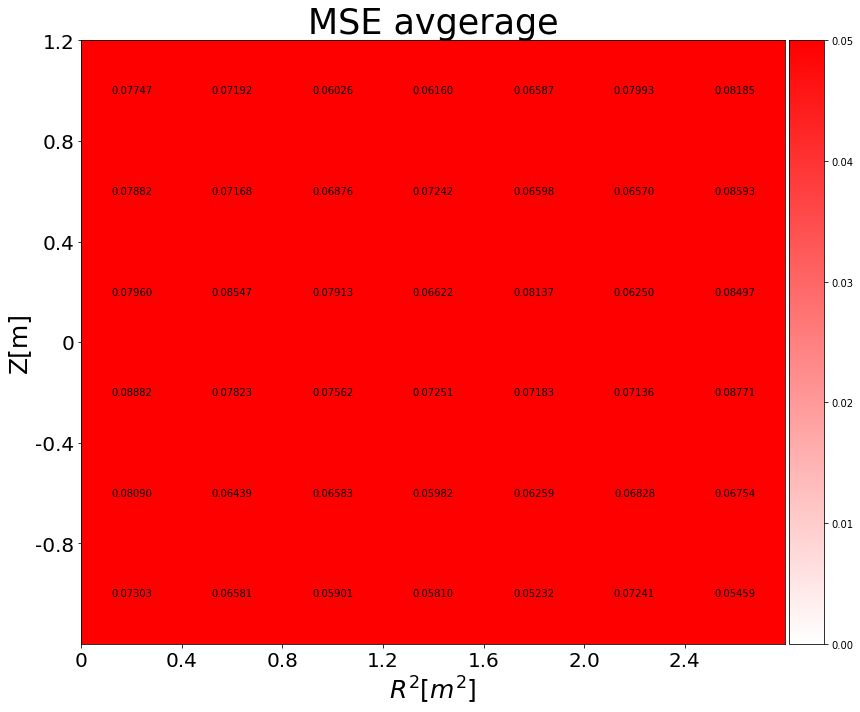

In [32]:
if geo == 1:
    maxvalue = 0.05
elif geo == 2:
    maxvalue = 0.1
elif geo == 3:
    maxvalue = 1

R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,4):
    for i in range(0,28,4):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.4) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.4)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append(np.average(np.array(test)))
   

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,7), cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-.5, 6, 1))
ax.set_yticks(np.arange(-.5, 5, 1))
ax.set_xticklabels(['0','0.4','0.8','1.2','1.6','2.0','2.4'],fontsize=20)
ax.set_yticklabels(['1.2','0.8','0.4','0','-0.4','-0.8'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(6):
    for j in range(7):
        aaa = np.array(ME_eff).reshape(-1,7)[i, j]
        text = ax.text(j, i, f"{aaa:.5f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE avgerage",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()

